# About the dataset

1200 panoramic X-ray images were taken from **Studio Dentistico Dott. Riccardo Chiodi, Focene, Italy** for this research.   

Dr. Nuray Khassenova, Dr. Ayana Zholdoshbekova helped with dataset annotation.  
  
About the Dataset:   
1200 images are annotated for dental pathologies.  
1200 images for upper jaw teeth labeling.  
1200 images for lower jaw teeth labeling.  


#Dental Pathologies

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
ROOT_DIR = '/content/gdrive/My Drive/Dental Project'


In [3]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 977.1/977.1 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 92.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 75.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 74.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

# Imports

In [4]:
from ultralytics import YOLO


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [5]:
import os
import shutil
import random

import locale

import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Split dataset

In [ ]:
def move_files(file_list, split_type):
    os.makedirs(os.path.join(dataset_path, split_type, "images"), exist_ok=True)
    os.makedirs(os.path.join(dataset_path, split_type, "labels"), exist_ok=True)

    for file in file_list:
        img_src = os.path.join(images_path, file)
        label_src = os.path.join(labels_path, file.replace(".png", ".txt"))

        img_dst = os.path.join(dataset_path, split_type, "images", file)
        label_dst = os.path.join(dataset_path, split_type, "labels", file.replace(".png", ".txt"))

        shutil.copy(img_src, img_dst)
        if os.path.exists(label_src):
            shutil.copy(label_src, label_dst)

In [ ]:
dataset_path = "/content/gdrive/My Drive/Dental Project/dental_pathologies"
images_path = os.path.join(dataset_path, "images")
labels_path = os.path.join(dataset_path, "labels")

image_files = [f for f in os.listdir(images_path) if f.endswith(".png")]

random.seed(42)
random.shuffle(image_files)

train_split = int(0.8 * len(image_files))
val_split = int(0.9 * len(image_files))

train_files = image_files[:train_split]
val_files = image_files[train_split:val_split]
test_files = image_files[val_split:]

move_files(train_files, "train")
move_files(val_files, "val")
move_files(test_files, "test")


# YOLO

In [ ]:
ROOT_DIR = "/content/gdrive/MyDrive/Dental Project/dental_pathologies"

config_path = os.path.join(ROOT_DIR, "config.yaml")

In [ ]:
model = YOLO("yolov8m.pt")
results = model.train(data=config_path, epochs=50, patience=10)


## Save

In [ ]:
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
!scp -r /content/runs/detect/train '/content/gdrive/My Drive/Dental Project/dental_pathologies'

# Check with one image

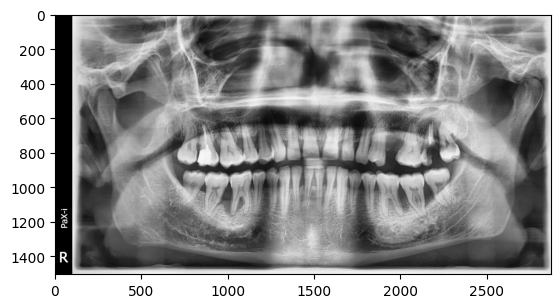

In [6]:
model_path = '/content/gdrive/My Drive/Dental Project/dental_pathologies/train/weights/best.pt'
model = YOLO(model_path)
image_path = '/content/gdrive/My Drive/Dental Project/dental_pathologies/test/images/P20181109_181347_0000.png'
image = cv2.imread(image_path)
image_height, image_width, channels = image.shape
plt.imshow(image)


image 1/1 /content/gdrive/My Drive/Dental Project/dental_pathologies/test/images/P20181109_181347_0000.png: 352x640 1 Caries, 1 Periodontitis, 1 Treated Tooth, 28 Healthy Tooths, 479.8ms
Speed: 15.9ms preprocess, 479.8ms inference, 34.0ms postprocess per image at shape (1, 3, 352, 640)


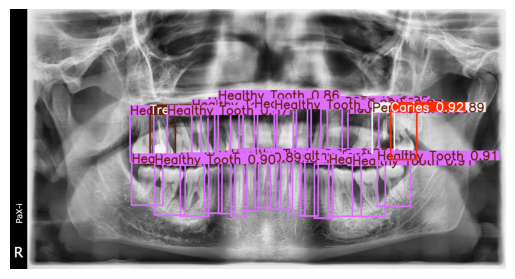

In [10]:
results = model(image_path)
plt.imshow(results[0].plot())  # Convert array to image
plt.axis("off")  # Hide axes
plt.show()


In [11]:
threshold = 0.5
filtered_main = [box for box in results[0].boxes if box.conf > threshold]

## Performance

In [ ]:
test_images = "/content/gdrive/MyDrive/Dental Project/dental_pathologies/test/images"
results = model(test_images, save=True, conf=0.6)



image 1/96 /content/gdrive/MyDrive/Dental Project/dental_pathologies/test/images/103.png: 288x640 (no detections), 44.2ms
image 2/96 /content/gdrive/MyDrive/Dental Project/dental_pathologies/test/images/116.png: 256x640 1 Healthy Tooth, 42.4ms
image 3/96 /content/gdrive/MyDrive/Dental Project/dental_pathologies/test/images/13.png: 288x640 (no detections), 22.6ms
image 4/96 /content/gdrive/MyDrive/Dental Project/dental_pathologies/test/images/14.png: 288x640 (no detections), 21.8ms
image 5/96 /content/gdrive/MyDrive/Dental Project/dental_pathologies/test/images/20.png: 288x640 (no detections), 21.8ms
image 6/96 /content/gdrive/MyDrive/Dental Project/dental_pathologies/test/images/39.png: 224x640 1 Periodontitis, 1 Treated Tooth, 44.5ms
image 7/96 /content/gdrive/MyDrive/Dental Project/dental_pathologies/test/images/4.png: 320x640 (no detections), 47.5ms
image 8/96 /content/gdrive/MyDrive/Dental Project/dental_pathologies/test/images/59.png: 288x640 1 Periodontitis, 22.7ms
image 9/96 /c

In [ ]:
metrics = model.val(data=config_path, split="test")


Ultralytics 8.3.84 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,843,813 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /content/gdrive/MyDrive/Dental Project/dental_pathologies/test/labels.cache... 82 images, 14 backgrounds, 0 corrupt: 100%|██████████| 96/96 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:32<00:00,  5.35s/it]


                   all         96       2232      0.807      0.824      0.868      0.694
                Caries         41         90       0.76      0.733      0.803       0.66
              Pulpitis         20         26      0.842      0.654      0.801      0.671
         Periodontitis         27         68      0.907      0.926      0.962      0.738
               Unknown         16         27      0.504      0.481       0.58      0.378
         Treated Tooth         68        427      0.822      0.986      0.972      0.818
         Healthy Tooth         80       1562      0.832      0.984      0.966      0.799
             Prothesis          8         32      0.982          1      0.995      0.798
Speed: 0.4ms preprocess, 12.2ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/val3


In [ ]:
def evaluation_metrics(metrics):
  print(f"mAP@50: {metrics.box.map50:.4f}")
  print(f"mAP@75: {metrics.box.map75:.4f}")
  print(f"mAP@50-95: {metrics.box.map:.4f}")
  print(f"Precision: {metrics.box.mp:.4f}")
  print(f"Recall: {metrics.box.mr:.4f}")
evaluation_metrics(metrics)

mAP@50: 0.8684
mAP@75: 0.8428
mAP@50-95: 0.6945
Precision: 0.8072
Recall: 0.8236


In [ ]:
def per_class_evaluation_metrics(metrics):
  for class_idx, class_name in enumerate(metrics.names.values()):
      print(f"*Class: {class_name}")
      print(f"   - AP@50: {metrics.box.ap50[class_idx]:.4f}")
      print(f"   - Precision: {metrics.box.p[class_idx]:.4f}")
      print(f"   - Recall: {metrics.box.r[class_idx]:.4f}")
per_class_evaluation_metrics(metrics)

*Class: Caries
   - AP@50: 0.8030
   - Precision: 0.7602
   - Recall: 0.7333
*Class: Pulpitis
   - AP@50: 0.8009
   - Precision: 0.8419
   - Recall: 0.6538
*Class: Periodontitis
   - AP@50: 0.9623
   - Precision: 0.9072
   - Recall: 0.9265
*Class: Unknown
   - AP@50: 0.5803
   - Precision: 0.5041
   - Recall: 0.4815
*Class: Treated Tooth
   - AP@50: 0.9717
   - Precision: 0.8223
   - Recall: 0.9863
*Class: Healthy Tooth
   - AP@50: 0.9656
   - Precision: 0.8321
   - Recall: 0.9837
*Class: Prothesis
   - AP@50: 0.9950
   - Precision: 0.9823
   - Recall: 1.0000


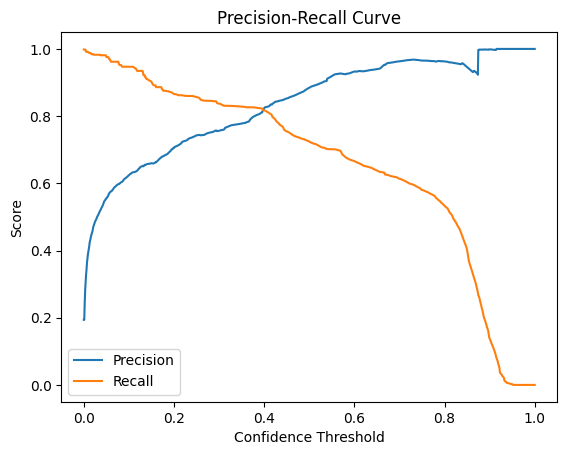

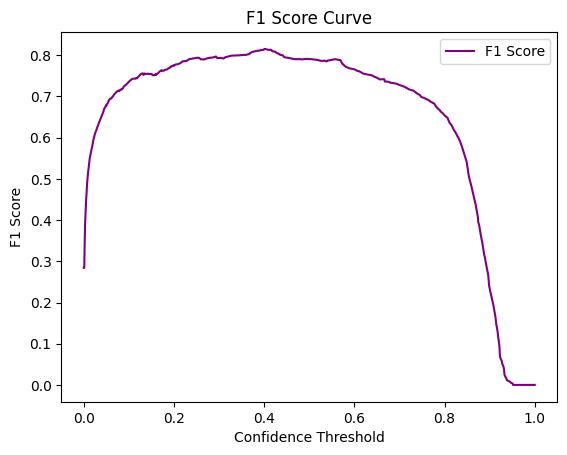

In [ ]:
def plot_metrics(metrics):
  px = np.array(metrics.box.px)
  precision = np.mean(metrics.box.p_curve, axis=0)
  recall = np.mean(metrics.box.r_curve, axis=0)
  f1 = np.mean(metrics.box.f1_curve, axis=0)

  plt.plot(px, precision, label="Precision")
  plt.plot(px, recall, label="Recall")
  plt.xlabel("Confidence Threshold")
  plt.ylabel("Score")
  plt.legend()
  plt.title("Precision-Recall Curve")
  plt.show()

  plt.plot(px, f1, label="F1 Score", color='purple')
  plt.xlabel("Confidence Threshold")
  plt.ylabel("F1 Score")
  plt.legend()
  plt.title("F1 Score Curve")
  plt.show()
plot_metrics(metrics)


# Upper Jaw


## Training

In [ ]:
dataset_path = "/content/gdrive/My Drive/Dental Project/upper_jaw"
images_path = os.path.join(dataset_path, "images")
labels_path = os.path.join(dataset_path, "labels")

image_files = [f for f in os.listdir(images_path) if f.endswith(".png")]

random.seed(42)
random.shuffle(image_files)

train_split = int(0.8 * len(image_files))
val_split = int(0.9 * len(image_files))

train_files = image_files[:train_split]
val_files = image_files[train_split:val_split]
test_files = image_files[val_split:]

move_files(train_files, "train")
move_files(val_files, "val")
move_files(test_files, "test")

In [ ]:
ROOT_DIR2 = "/content/gdrive/MyDrive/Dental Project/upper_jaw"
config_path2 = os.path.join(ROOT_DIR2, "config1.yaml")
model1 = YOLO("yolov8m.pt")

results1 = model1.train(data=config_path2, epochs=100, patience=10)

Ultralytics 8.3.82 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/gdrive/MyDrive/Dental Project/upper_jaw/config1.yaml, epochs=100, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_lab

train: Scanning /content/gdrive/MyDrive/Dental Project/upper_jaw/train/labels.cache... 160 images, 2 backgrounds, 0 corrupt: 100%|██████████| 160/160 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/gdrive/MyDrive/Dental Project/upper_jaw/val/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000833, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100        12G      2.372      4.937      1.844        343        640: 100%|██████████| 10/10 [00:09<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.47it/s]

                   all         20        241      0.115       0.36      0.115     0.0681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      12.1G      1.321      2.055      1.178        332        640: 100%|██████████| 10/10 [00:06<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.84it/s]

                   all         20        241      0.375      0.644      0.462      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      12.1G      1.193      1.345      1.089        354        640: 100%|██████████| 10/10 [00:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.45it/s]

                   all         20        241      0.366      0.672       0.49      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      12.2G      1.154      1.158       1.14        424        640: 100%|██████████| 10/10 [00:05<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]

                   all         20        241      0.532      0.696      0.695      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      12.2G      1.068      0.984      1.088        325        640: 100%|██████████| 10/10 [00:05<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]

                   all         20        241      0.663      0.817      0.789      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      11.9G      1.058     0.8723      1.093        293        640: 100%|██████████| 10/10 [00:06<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]

                   all         20        241      0.674      0.762      0.792      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      12.1G      1.057     0.8706      1.079        429        640: 100%|██████████| 10/10 [00:07<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all         20        241      0.868      0.763      0.901      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      12.1G      1.016     0.7357      1.064        351        640: 100%|██████████| 10/10 [00:05<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.55it/s]

                   all         20        241      0.876      0.819      0.913      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      12.1G       1.03     0.7121      1.095        464        640: 100%|██████████| 10/10 [00:05<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]

                   all         20        241      0.854      0.867       0.94      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      12.1G      1.006     0.6769      1.071        392        640: 100%|██████████| 10/10 [00:05<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]

                   all         20        241      0.824      0.859      0.909      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      12.1G      1.058     0.7586      1.083        386        640: 100%|██████████| 10/10 [00:05<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.88it/s]

                   all         20        241      0.762      0.916      0.914      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      12.1G      1.081     0.7175      1.094        453        640: 100%|██████████| 10/10 [00:06<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.82it/s]

                   all         20        241      0.837      0.922      0.944      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      12.1G      1.001     0.6964      1.063        455        640: 100%|██████████| 10/10 [00:06<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.92it/s]

                   all         20        241      0.857      0.881      0.935      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100        12G     0.9671     0.6499      1.051        430        640: 100%|██████████| 10/10 [00:05<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.92it/s]

                   all         20        241      0.858      0.878      0.922      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      12.1G     0.9516     0.5926      1.032        422        640: 100%|██████████| 10/10 [00:05<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.93it/s]

                   all         20        241      0.699      0.883      0.818        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      12.2G     0.9523     0.6066      1.043        435        640: 100%|██████████| 10/10 [00:06<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.76it/s]

                   all         20        241      0.857       0.86      0.926      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      11.8G     0.9324     0.5549      1.013        437        640: 100%|██████████| 10/10 [00:05<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

                   all         20        241      0.852      0.873      0.916      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      12.1G     0.9451     0.5679      1.025        422        640: 100%|██████████| 10/10 [00:05<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.63it/s]

                   all         20        241      0.871      0.895      0.944      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      11.9G     0.9073     0.5278      1.031        410        640: 100%|██████████| 10/10 [00:05<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

                   all         20        241      0.876      0.918      0.958      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      12.2G     0.9143     0.5284      1.031        364        640: 100%|██████████| 10/10 [00:06<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.26it/s]

                   all         20        241      0.891       0.93      0.966      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100        12G     0.8887     0.5227     0.9945        445        640: 100%|██████████| 10/10 [00:06<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]

                   all         20        241      0.911      0.913      0.959      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      12.1G     0.9078     0.5209      1.007        523        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.98it/s]

                   all         20        241      0.863      0.973      0.962      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      12.1G     0.8663     0.4863     0.9853        386        640: 100%|██████████| 10/10 [00:06<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

                   all         20        241      0.905      0.951      0.973      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      12.1G     0.8863      0.497     0.9977        302        640: 100%|██████████| 10/10 [00:05<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.77it/s]

                   all         20        241        0.9       0.93      0.964      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      11.8G     0.8795     0.4792      1.001        395        640: 100%|██████████| 10/10 [00:06<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.14it/s]

                   all         20        241      0.934       0.93      0.971      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      12.1G     0.8666      0.462      0.992        501        640: 100%|██████████| 10/10 [00:05<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.46it/s]

                   all         20        241        0.9      0.951       0.97      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      12.1G     0.8629     0.4701      0.984        392        640: 100%|██████████| 10/10 [00:06<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.16it/s]

                   all         20        241      0.916      0.915      0.971      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      12.1G     0.8601      0.469      0.987        434        640: 100%|██████████| 10/10 [00:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

                   all         20        241      0.906      0.947      0.978      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100        12G     0.8272     0.4448     0.9665        409        640: 100%|██████████| 10/10 [00:05<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

                   all         20        241      0.937      0.938       0.98      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      11.9G     0.8469     0.4589     0.9889        331        640: 100%|██████████| 10/10 [00:05<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.17it/s]

                   all         20        241      0.933      0.917      0.974      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      12.1G     0.8428     0.4509     0.9751        509        640: 100%|██████████| 10/10 [00:05<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]

                   all         20        241      0.893      0.947      0.973      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      11.9G     0.8323     0.4436     0.9969        322        640: 100%|██████████| 10/10 [00:06<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.22it/s]

                   all         20        241      0.902      0.956      0.971      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      12.1G     0.8071     0.4284     0.9664        453        640: 100%|██████████| 10/10 [00:05<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.36it/s]

                   all         20        241      0.895      0.944      0.968        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      11.9G     0.8024     0.4256     0.9819        356        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.13it/s]

                   all         20        241      0.886       0.97       0.98      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      12.1G     0.8111     0.4278     0.9472        367        640: 100%|██████████| 10/10 [00:05<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]

                   all         20        241      0.897      0.962       0.98      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      11.9G     0.7805     0.4258     0.9726        375        640: 100%|██████████| 10/10 [00:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.64it/s]

                   all         20        241      0.915      0.955      0.975      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      12.1G     0.7815     0.4064     0.9461        429        640: 100%|██████████| 10/10 [00:05<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.51it/s]

                   all         20        241      0.899      0.956      0.982      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      12.2G     0.7616     0.4003     0.9558        419        640: 100%|██████████| 10/10 [00:06<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.53it/s]

                   all         20        241      0.939      0.926      0.975      0.745
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 28, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



38 epochs completed in 0.128 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 52.0MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.82 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,844,392 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]


                   all         20        241      0.907      0.947      0.977      0.759
                    T1         19         38      0.959          1      0.994      0.782
                    T2         19         35        0.9      0.971      0.989      0.751
                    T3         20         37          1      0.971      0.993      0.791
                    T4         19         33      0.979      0.939       0.99      0.777
                    T5         18         30       0.88      0.974      0.983      0.773
                    T6         16         25      0.858      0.967      0.974      0.821
                    T7         16         29      0.913      0.897      0.974       0.76
                    T8          8         14      0.764      0.857       0.92      0.618
Speed: 0.1ms preprocess, 7.2ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train3


In [ ]:
!scp -r /content/runs/detect/train3 '/content/gdrive/My Drive/Dental Project/upper_jaw'

## Models Performance on One Image

In [12]:
model_path = '/content/gdrive/My Drive/Dental Project/upper_jaw/train3/weights/best.pt'
model1 = YOLO(model_path)


image 1/1 /content/gdrive/My Drive/Dental Project/dental_pathologies/test/images/P20181109_181347_0000.png: 352x640 2 T1s, 2 T2s, 2 T3s, 3 T4s, 2 T5s, 2 T6s, 2 T7s, 2 T8s, 468.5ms
Speed: 6.1ms preprocess, 468.5ms inference, 9.4ms postprocess per image at shape (1, 3, 352, 640)


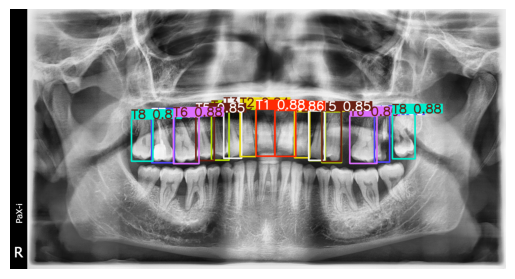

In [13]:
results1 = model1(image_path)
plt.imshow(results1[0].plot())
plt.axis("off")  # Hide axes
plt.show()

## Filter bboxes

In [14]:
threshold = 0.6
filtered_boxes = [box for box in results1[0].boxes if box.conf > threshold]


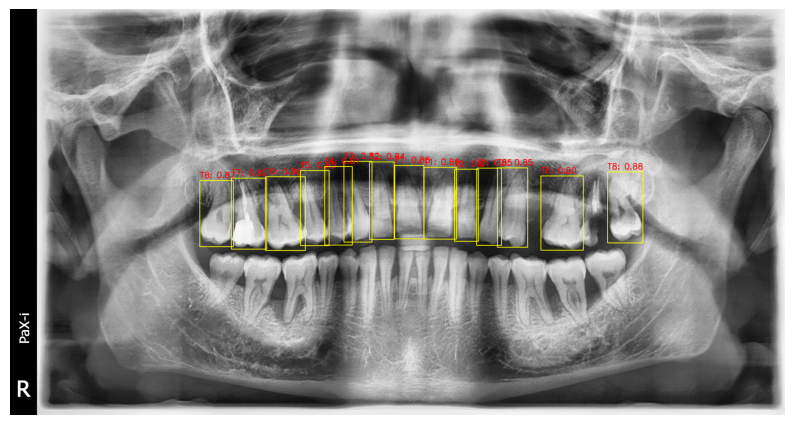

In [21]:
image_path = results1[0].path
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

class_names = ["T1", "T2", "T3", "T4", "T5", "T6", "T7", "T8"]

for i, box in enumerate(filtered_boxes):
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    class_name = class_names[int(box.cls.item())]
    confidence = box.conf.item()

    cv2.rectangle(image, (x1, y1), (x2, y2), (255, 255, 0), 2)
    cv2.putText(image, f"{class_name}: {confidence:.2f}", (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis("off")
plt.show()


## Evaluate

In [ ]:
test_images = "/content/gdrive/MyDrive/Dental Project/upper_jaw/test/images"
results = model1(test_images, save=True, conf=0.5)


image 1/21 /content/gdrive/MyDrive/Dental Project/upper_jaw/test/images/100.png: 256x640 2 T1s, 2 T2s, 2 T3s, 2 T4s, 2 T5s, 2 T6s, 2 T7s, 19.6ms
image 2/21 /content/gdrive/MyDrive/Dental Project/upper_jaw/test/images/102.png: 288x640 2 T1s, 2 T2s, 2 T3s, 2 T4s, 1 T5, 1 T6, 2 T7s, 1 T8, 23.4ms
image 3/21 /content/gdrive/MyDrive/Dental Project/upper_jaw/test/images/105.png: 288x640 2 T1s, 2 T2s, 2 T3s, 2 T4s, 1 T6, 2 T7s, 22.0ms
image 4/21 /content/gdrive/MyDrive/Dental Project/upper_jaw/test/images/13.png: 288x640 2 T1s, 2 T2s, 2 T3s, 2 T4s, 2 T5s, 1 T7, 2 T8s, 21.9ms
image 5/21 /content/gdrive/MyDrive/Dental Project/upper_jaw/test/images/15.png: 288x640 2 T1s, 2 T2s, 2 T3s, 2 T4s, 2 T5s, 2 T6s, 2 T7s, 2 T8s, 21.9ms
image 6/21 /content/gdrive/MyDrive/Dental Project/upper_jaw/test/images/20.png: 288x640 2 T1s, 2 T2s, 2 T3s, 1 T4, 1 T5, 2 T7s, 21.9ms
image 7/21 /content/gdrive/MyDrive/Dental Project/upper_jaw/test/images/23.png: 288x640 2 T1s, 2 T2s, 2 T3s, 1 T4, 2 T5s, 2 T6s, 1 T7, 2 T8

In [ ]:
metrics1 = model1.val(data=config_path2, split="test")

Ultralytics 8.3.82 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)


val: Scanning /content/gdrive/MyDrive/Dental Project/upper_jaw/test/labels.cache... 21 images, 0 backgrounds, 0 corrupt: 100%|██████████| 21/21 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.09s/it]


                   all         21        280       0.98      0.977       0.99      0.751
                    T1         21         42      0.995          1      0.995      0.759
                    T2         20         40          1      0.976      0.995      0.687
                    T3         21         41      0.975      0.953      0.991      0.762
                    T4         20         37      0.995          1      0.995      0.742
                    T5         20         34      0.969      0.971       0.99      0.753
                    T6         17         29       0.99          1      0.995      0.805
                    T7         21         37      0.973      0.964      0.974      0.768
                    T8         13         20      0.944       0.95      0.988      0.729
Speed: 2.0ms preprocess, 17.6ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/val3


In [ ]:
evaluation_metrics(metrics1)

mAP@50: 0.9904
mAP@75: 0.9217
mAP@50-95: 0.7506
Precision: 0.9801
Recall: 0.9767


In [ ]:
per_class_evaluation_metrics(metrics1)

*Class: T1
   - AP@50: 0.9950
   - Precision: 0.9948
   - Recall: 1.0000
*Class: T2
   - AP@50: 0.9950
   - Precision: 1.0000
   - Recall: 0.9757
*Class: T3
   - AP@50: 0.9911
   - Precision: 0.9750
   - Recall: 0.9531
*Class: T4
   - AP@50: 0.9950
   - Precision: 0.9946
   - Recall: 1.0000
*Class: T5
   - AP@50: 0.9896
   - Precision: 0.9693
   - Recall: 0.9706
*Class: T6
   - AP@50: 0.9950
   - Precision: 0.9898
   - Recall: 1.0000
*Class: T7
   - AP@50: 0.9737
   - Precision: 0.9727
   - Recall: 0.9642
*Class: T8
   - AP@50: 0.9885
   - Precision: 0.9443
   - Recall: 0.9500


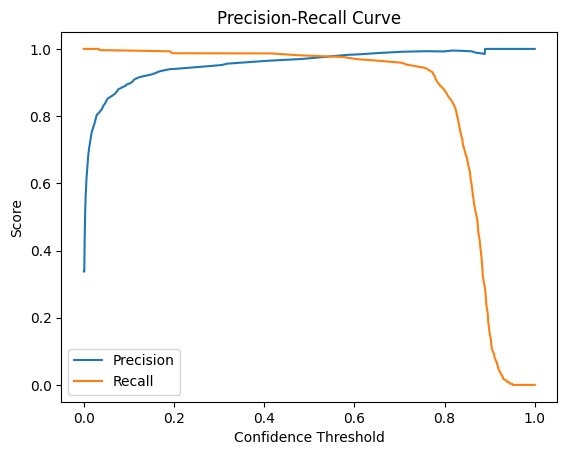

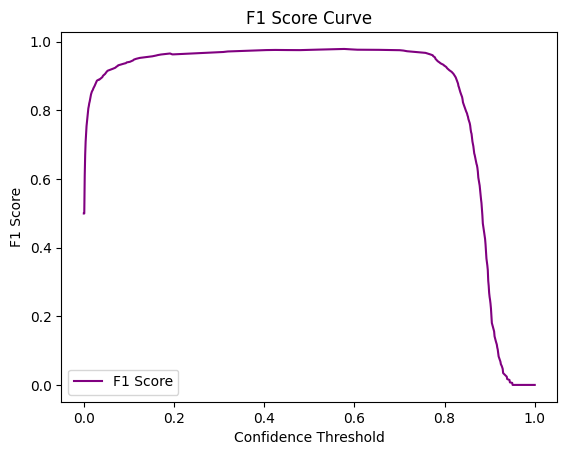

In [ ]:
plot_metrics(metrics1)

# Lower Jaw

## Training

In [ ]:
dataset_path = "/content/gdrive/My Drive/Dental Project/lower_jaw"
images_path = os.path.join(dataset_path, "images")
labels_path = os.path.join(dataset_path, "labels")

image_files = [f for f in os.listdir(images_path) if f.endswith(".png")]

random.seed(42)
random.shuffle(image_files)

train_split = int(0.8 * len(image_files))
val_split = int(0.9 * len(image_files))

train_files = image_files[:train_split]
val_files = image_files[train_split:val_split]
test_files = image_files[val_split:]

move_files(train_files, "train")
move_files(val_files, "val")
move_files(test_files, "test")

In [ ]:
ROOT_DIR3 = "/content/gdrive/MyDrive/Dental Project/lower_jaw"

config_path3 = os.path.join(ROOT_DIR3, "config2.yaml")
model2 = YOLO("yolov8m.pt")
results2 = model2.train(data=config_path3, epochs=100, patience=10)

Ultralytics 8.3.82 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/gdrive/MyDrive/Dental Project/lower_jaw/config2.yaml, epochs=100, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_lab

train: Scanning /content/gdrive/MyDrive/Dental Project/lower_jaw/train/labels... 160 images, 2 backgrounds, 0 corrupt: 100%|██████████| 160/160 [00:02<00:00, 74.20it/s]


train: New cache created: /content/gdrive/MyDrive/Dental Project/lower_jaw/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/gdrive/MyDrive/Dental Project/lower_jaw/val/labels... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<00:00, 54.73it/s]

val: New cache created: /content/gdrive/MyDrive/Dental Project/lower_jaw/val/labels.cache


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000833, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train4
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      12.5G      2.308      4.742      1.807        355        640: 100%|██████████| 10/10 [00:09<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

                   all         20        264      0.205      0.374      0.188      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      6.58G      1.245       1.92      1.169        327        640: 100%|██████████| 10/10 [00:06<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all         20        264      0.543      0.786      0.657      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      6.65G      1.078      1.213      1.059        368        640: 100%|██████████| 10/10 [00:06<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.53it/s]

                   all         20        264      0.598      0.918      0.773      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      6.67G      1.022      1.029      1.066        407        640: 100%|██████████| 10/10 [00:06<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.48it/s]

                   all         20        264      0.824      0.912      0.939       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      6.42G     0.9898     0.8371      1.059        355        640: 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.86it/s]

                   all         20        264      0.885      0.927      0.964      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      6.63G     0.9884     0.7409      1.055        314        640: 100%|██████████| 10/10 [00:06<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]

                   all         20        264      0.872       0.85       0.94      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      6.54G     0.9904     0.7166       1.05        412        640: 100%|██████████| 10/10 [00:06<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]

                   all         20        264      0.848       0.95      0.973      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      6.42G     0.9663     0.6456      1.035        357        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]

                   all         20        264      0.921      0.895      0.951      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      6.43G     0.9747     0.6742      1.057        513        640: 100%|██████████| 10/10 [00:05<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]

                   all         20        264      0.969      0.963      0.986      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      6.44G     0.9468     0.6423      1.024        446        640: 100%|██████████| 10/10 [00:06<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.25it/s]

                   all         20        264      0.962      0.964      0.981      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      6.59G     0.9465     0.6218      1.029        400        640: 100%|██████████| 10/10 [00:05<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]

                   all         20        264      0.939      0.953      0.978      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      6.63G     0.9552     0.6265       1.03        493        640: 100%|██████████| 10/10 [00:05<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.74it/s]

                   all         20        264      0.915       0.93      0.985      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      6.55G     0.9151     0.5893      1.014        454        640: 100%|██████████| 10/10 [00:05<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.88it/s]

                   all         20        264      0.952       0.97      0.985      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      6.45G     0.8993     0.5423      1.019        410        640: 100%|██████████| 10/10 [00:05<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

                   all         20        264      0.961       0.95      0.989      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      6.55G     0.8985     0.5431      1.012        436        640: 100%|██████████| 10/10 [00:05<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.55it/s]

                   all         20        264      0.959      0.967      0.988      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      6.44G     0.9009     0.5214      1.014        444        640: 100%|██████████| 10/10 [00:05<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.79it/s]

                   all         20        264      0.973      0.977       0.99      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      6.55G     0.8859     0.5076     0.9992        462        640: 100%|██████████| 10/10 [00:06<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.10it/s]

                   all         20        264      0.975      0.982      0.991      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      6.66G     0.8904     0.5064     0.9959        449        640: 100%|██████████| 10/10 [00:07<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]

                   all         20        264      0.955      0.973      0.984      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      6.56G     0.8691     0.5063     0.9989        377        640: 100%|██████████| 10/10 [00:07<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         20        264      0.965      0.973      0.987      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      6.45G     0.8679     0.4878      1.003        402        640: 100%|██████████| 10/10 [00:06<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.21it/s]

                   all         20        264      0.974      0.982      0.993      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      6.54G     0.8781     0.4894     0.9852        493        640: 100%|██████████| 10/10 [00:06<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

                   all         20        264      0.971      0.972      0.989      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      6.63G     0.8752     0.4862     0.9805        531        640: 100%|██████████| 10/10 [00:06<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         20        264      0.974      0.978      0.987      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      6.58G     0.8805     0.4747     0.9889        361        640: 100%|██████████| 10/10 [00:06<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.90it/s]

                   all         20        264      0.984      0.965       0.99      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      6.62G     0.8683      0.473     0.9925        308        640: 100%|██████████| 10/10 [00:06<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]

                   all         20        264      0.974       0.96      0.987      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      6.55G     0.8999     0.4754      1.023        445        640: 100%|██████████| 10/10 [00:05<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.47it/s]

                   all         20        264      0.983      0.983      0.989      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      6.61G     0.8531     0.4488     0.9886        513        640: 100%|██████████| 10/10 [00:05<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.84it/s]

                   all         20        264      0.957      0.989      0.992      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      6.58G     0.8841     0.4715      0.995        436        640: 100%|██████████| 10/10 [00:06<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.62it/s]

                   all         20        264      0.976       0.98      0.989      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      6.42G     0.8568     0.4523     0.9811        510        640: 100%|██████████| 10/10 [00:06<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.59it/s]

                   all         20        264       0.97      0.984      0.991      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      6.55G     0.8585     0.4422     0.9809        380        640: 100%|██████████| 10/10 [00:05<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.31it/s]

                   all         20        264      0.972      0.983      0.991      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      6.44G     0.8373     0.4351     0.9868        308        640: 100%|██████████| 10/10 [00:06<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]

                   all         20        264      0.974       0.98      0.992      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      6.59G      0.835     0.4334     0.9684        497        640: 100%|██████████| 10/10 [00:05<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.92it/s]

                   all         20        264      0.971      0.986      0.992      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      6.41G     0.8403      0.433     0.9924        331        640: 100%|██████████| 10/10 [00:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.40it/s]

                   all         20        264       0.97      0.983      0.992      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      6.57G     0.8013     0.4134     0.9681        426        640: 100%|██████████| 10/10 [00:06<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]

                   all         20        264      0.977      0.982       0.99      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      6.43G     0.7953     0.4118     0.9836        340        640: 100%|██████████| 10/10 [00:06<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

                   all         20        264      0.968      0.961      0.987       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      6.57G     0.7889     0.4069     0.9418        376        640: 100%|██████████| 10/10 [00:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.79it/s]

                   all         20        264      0.963      0.971      0.984      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      6.44G      0.791     0.4082     0.9818        402        640: 100%|██████████| 10/10 [00:05<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.50it/s]

                   all         20        264      0.963      0.976       0.99      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100       6.6G     0.8027     0.4145     0.9428        443        640: 100%|██████████| 10/10 [00:05<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.22it/s]

                   all         20        264      0.973      0.983      0.991      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      6.45G       0.77     0.3986      0.962        421        640: 100%|██████████| 10/10 [00:06<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.13it/s]

                   all         20        264      0.974      0.984       0.99      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      6.58G     0.7694     0.4019     0.9462        335        640: 100%|██████████| 10/10 [00:05<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]

                   all         20        264      0.975      0.974      0.985      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      6.61G     0.7887     0.4076     0.9754        353        640: 100%|██████████| 10/10 [00:05<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.65it/s]

                   all         20        264      0.978      0.983      0.989      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      6.55G     0.7887     0.4071     0.9454        435        640: 100%|██████████| 10/10 [00:05<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.94it/s]

                   all         20        264      0.971      0.978       0.99      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      6.44G     0.7838     0.4033     0.9762        413        640: 100%|██████████| 10/10 [00:05<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]

                   all         20        264      0.967      0.978      0.982      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      6.58G     0.7787     0.4021     0.9412        330        640: 100%|██████████| 10/10 [00:05<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]

                   all         20        264      0.964      0.966      0.985      0.754
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 33, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



43 epochs completed in 0.144 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 52.0MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics 8.3.82 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,844,392 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.34it/s]


                   all         20        264      0.977      0.982       0.99      0.785
                    B1         19         38      0.993          1      0.995      0.713
                    B2         19         38      0.994          1      0.995      0.746
                    B3         20         39          1      0.967      0.995      0.764
                    B4         20         39      0.995          1      0.995      0.788
                    B5         17         33      0.983          1      0.995      0.789
                    B6         15         24      0.958          1      0.995      0.861
                    B7         20         34      0.969      0.941      0.987      0.846
                    B8         11         19      0.923      0.947      0.962       0.77
Speed: 0.2ms preprocess, 6.7ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/train4


In [ ]:
!scp -r /content/runs/detect/train4 '/content/gdrive/My Drive/Dental Project/lower_jaw'

## Models Performance on One Image

In [15]:

model_path = '/content/gdrive/My Drive/Dental Project/lower_jaw/train4/weights/best.pt'
model2 = YOLO(model_path)


image 1/1 /content/gdrive/My Drive/Dental Project/dental_pathologies/test/images/P20181109_181347_0000.png: 352x640 2 B1s, 2 B2s, 2 B3s, 2 B4s, 2 B5s, 2 B6s, 2 B7s, 2 B8s, 295.0ms
Speed: 2.5ms preprocess, 295.0ms inference, 1.2ms postprocess per image at shape (1, 3, 352, 640)


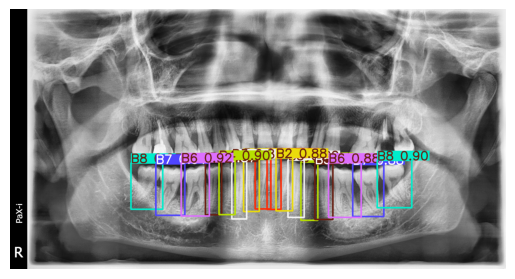

In [16]:
results2 = model2(image_path)
plt.imshow(results2[0].plot())
plt.axis("off")
plt.show()

# Filtering Lower

In [18]:
threshold = 0.6
filtered_boxes2 = [box for box in results2[0].boxes if box.conf > threshold]

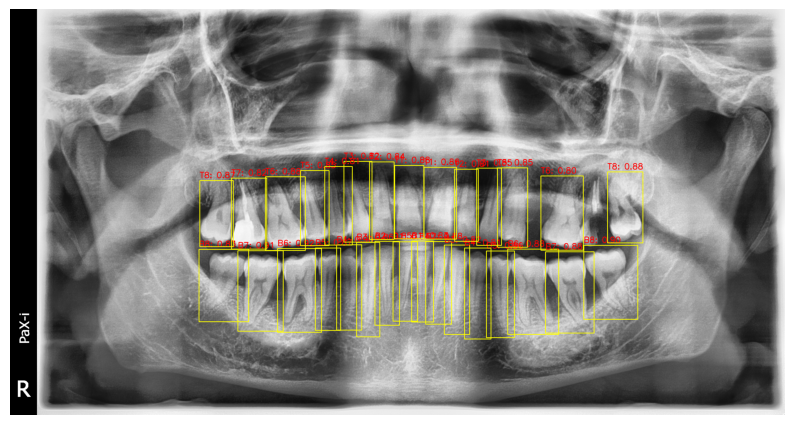

In [22]:
image_path = results1[0].path
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

class_names2 = ["B1", "B2", "B3", "B4", "B5", "B6", "B7", "B8"]

for i, box in enumerate(filtered_boxes2):
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    class_name = class_names2[int(box.cls.item())]
    confidence = box.conf.item()

    cv2.rectangle(image, (x1, y1), (x2, y2), (255, 255, 0), 2)
    cv2.putText(image, f"{class_name}: {confidence:.2f}", (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

for i, box in enumerate(filtered_boxes):
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    class_name = class_names[int(box.cls.item())]
    confidence = box.conf.item()

    cv2.rectangle(image, (x1, y1), (x2, y2), (255, 255, 0), 2)
    cv2.putText(image, f"{class_name}: {confidence:.2f}", (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis("off")
plt.show()


In the dental_pathologies dataset, teeth with only roots remaining are labeled also as Periodontitis, whereas in the tooth labeling dataset, they are not labeled at all, meaning they are considered absent. Since such teeth require extraction, they will be classified as **extraction needed**.  

Implants are labeled as Treated in the dental_pathologies dataset but are not labeled in the tooth labeling dataset. To ensure consistency, these cases will be classified as **implants**.  

All other unlabeled cases will be considered **absent teeth**.  


## Evaluate

In [ ]:
metrics2 = model2.val(data=config_path3, split="test")


Ultralytics 8.3.82 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)


val: Scanning /content/gdrive/MyDrive/Dental Project/lower_jaw/test/labels... 21 images, 0 backgrounds, 0 corrupt: 100%|██████████| 21/21 [00:00<00:00, 54.56it/s]

val: New cache created: /content/gdrive/MyDrive/Dental Project/lower_jaw/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.32s/it]


                   all         21        288      0.985      0.977      0.993      0.791
                    B1         20         40          1      0.996      0.995      0.708
                    B2         21         42      0.996          1      0.995      0.699
                    B3         20         40      0.975          1      0.995      0.803
                    B4         20         40          1      0.958      0.995       0.78
                    B5         20         35      0.987          1      0.995      0.814
                    B6         17         30          1       0.96      0.994      0.876
                    B7         19         38      0.972      0.947       0.99      0.848
                    B8         13         23      0.953      0.957      0.985      0.797
Speed: 7.2ms preprocess, 14.5ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs/detect/val4


In [ ]:
evaluation_metrics(metrics2)

mAP@50: 0.9929
mAP@75: 0.9508
mAP@50-95: 0.7906
Precision: 0.9853
Recall: 0.9772


In [ ]:
per_class_evaluation_metrics(metrics2)

*Class: B1
   - AP@50: 0.9950
   - Precision: 1.0000
   - Recall: 0.9962
*Class: B2
   - AP@50: 0.9950
   - Precision: 0.9955
   - Recall: 1.0000
*Class: B3
   - AP@50: 0.9950
   - Precision: 0.9748
   - Recall: 1.0000
*Class: B4
   - AP@50: 0.9945
   - Precision: 1.0000
   - Recall: 0.9582
*Class: B5
   - AP@50: 0.9950
   - Precision: 0.9870
   - Recall: 1.0000
*Class: B6
   - AP@50: 0.9940
   - Precision: 1.0000
   - Recall: 0.9596
*Class: B7
   - AP@50: 0.9903
   - Precision: 0.9715
   - Recall: 0.9474
*Class: B8
   - AP@50: 0.9847
   - Precision: 0.9534
   - Recall: 0.9565


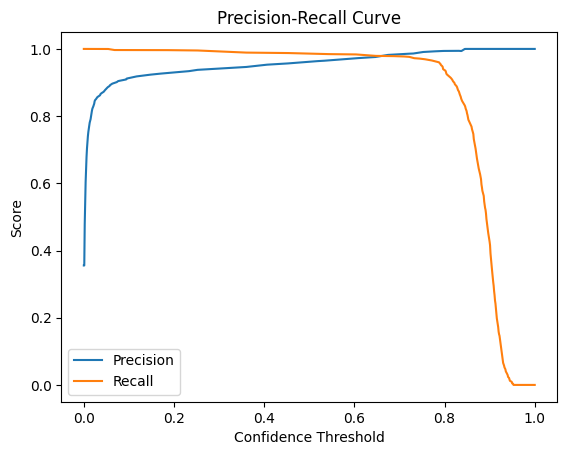

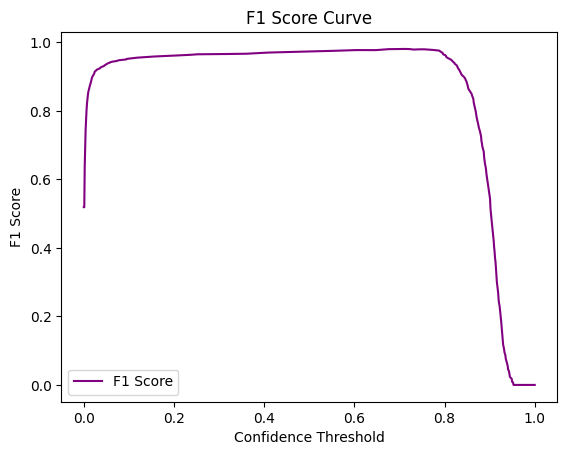

In [ ]:
plot_metrics(metrics2)

## Result

In [7]:
# caries = 0
#pulpitis = 1
# periodontitis = 2
# unknown = 3
# treated = 4
# healthy = 5
def make_df(filtered_main, filtered_boxes, filtered_boxes_2):
  teeth_dict = {"T1": [0]*7, "T2": [0]* 7, "T3": [0]*7, "T4": [0]*7, "T5": [0]*7, "T6":[0]*7, "T7":[0]*7, "T8": [0]*7,
              "B1": [0]*7, "B2": [0]*7, "B3": [0]*7, "B4": [0]*7, "B5": [0]*7, "B6": [0]*7, "B7": [0]*7, "B8": [0]*7}

  epsilon = 0.015

  for box in filtered_main:
    x = box.xywh[0][0].item()
    y = box.xywh[0][1].item()
    for box2 in filtered_boxes:
      x1 = box2.xywh[0][0].item()
      y1 = box2.xywh[0][1].item()
      if abs((x-x1)/image_width) < epsilon and abs((y-y1)/image_height) < epsilon:
        teeth_dict[class_names[int(box2.cls.item())]][int(box.cls.item())] += 1
        break
    for box3 in filtered_boxes2:
      x2 = box3.xywh[0][0].item()
      y2 = box3.xywh[0][1].item()
      if abs((x-x2)/image_width) < epsilon and abs((y-y2)/image_height) < epsilon:
        teeth_dict[class_names2[int(box3.cls.item())]][int(box.cls.item())] += 1
        break

  for key in teeth_dict:
    sum_teeth = sum(teeth_dict[key])
    if sum_teeth < 2:
      teeth_dict[key].append(2-sum_teeth)
    else:
      teeth_dict[key].append(0)
  df = pd.DataFrame(teeth_dict, index = ["Caries", "Pulpitis", "Periodontitis", "Unknown", "Treated", "Healthy", "Prothesis", "Absent"])
  return df


In [23]:
df_overall_results = make_df(filtered_main, filtered_boxes, filtered_boxes2)
df_overall_results

,T1,T2,T3,T4,T5,T6,T7,T8,B1,B2,B3,B4,B5,B6,B7,B8
Caries,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
Pulpitis,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Periodontitis,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Unknown,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Treated,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
Healthy,2,2,2,1,2,2,0,1,2,2,2,2,2,2,2,2
Prothesis,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Absent,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0


In [24]:
len(filtered_boxes)

14

In [25]:
#different type of visualisation
def table_of_results(filtered_main, filtered_boxes,filtered_boxes2):
  epsilon = 0.015
  class_main = ["Caries", "Pulpitis", "Periodontitis", "Unknown", "Treated", "Healthy", "Prothesis"]
  final_dict = {"T1 right":"Absent", "T1 left":"Absent", "T2 right":"Absent", "T2 left":"Absent", "T3 right":"Absent", "T3 left":"Absent", "T4 right": "Absent", "T4 left":"Absent", "T5 right":"Absent", "T5 left":"Absent", "T6 right":"Absent", "T6 left":"Absent", "T7 right":"Absent", "T7 left":"Absent", "T8 right":"Absent", "T8 left":"Absent",
                "B1 right": "Absent", "B1 left": "Absent", "B2 right": "Absent", "B2 left": "Absent", "B3 right": "Absent", "B3 left": "Absent", "B4 right": "Absent", "B4 left": "Absent", "B5 right": "Absent", "B5 left":"Absent", "B6 right": "Absent", "B6 left": "Absent", "B7 right": "Absent", "B7 left": "Absent", "B8 right": "Absent", "B8 left": "Absent"}

  count_pairs_upper_jaw = {0:[], 1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[]}
  count_pairs_lower_jaw = {0:[], 1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[]}

  for box in filtered_boxes:
    count_pairs_upper_jaw[int(box.cls.item())].append([box.xywh[0][0],box.xywh[0][1]])
  for box in filtered_boxes2:
    count_pairs_lower_jaw[int(box.cls.item())].append([box.xywh[0][0],box.xywh[0][1]])

  for key in count_pairs_upper_jaw:
    if len(count_pairs_upper_jaw[key]) > 1:
      count_pairs_upper_jaw[key] = sorted(count_pairs_upper_jaw[key], key = lambda x: x[0])
    if len(count_pairs_lower_jaw[key]) > 1:
      count_pairs_lower_jaw[key] = sorted(count_pairs_lower_jaw[key], key = lambda x: x[0])
  cls_with_pairs_upper_jaw = [key for key in count_pairs_upper_jaw if len(count_pairs_upper_jaw[key]) == 2]
  cls_with_pairs_lower_jaw = [key for key in count_pairs_lower_jaw if len(count_pairs_lower_jaw[key]) == 2]

  if len(cls_with_pairs_upper_jaw) == 0 or len(cls_with_pairs_lower_jaw) == 0:
    return
  for box in filtered_main:
    x = box.xywh[0][0].item()
    y = box.xywh[0][1].item()
    for key in cls_with_pairs_upper_jaw:
      x1 = count_pairs_upper_jaw[key][0][0].item()
      y1 = count_pairs_upper_jaw[key][0][1].item()
      x2 = count_pairs_upper_jaw[key][1][0].item()
      y2 = count_pairs_upper_jaw[key][1][1].item()
      if abs((x-x1)/image_width) < epsilon and abs((y-y1)/image_height) < epsilon:
        final_dict[class_names[key] + " left"] = class_main[int(box.cls.item())]
        break
      elif abs((x-x2)/image_width) < epsilon and abs((y-y2)/image_height) < epsilon:
        final_dict[class_names[key] + " right"] = class_main[int(box.cls.item())]
        break
    for key in cls_with_pairs_lower_jaw:
      x1 = count_pairs_lower_jaw[key][0][0].item()
      y1 = count_pairs_lower_jaw[key][0][1].item()
      x2 = count_pairs_lower_jaw[key][1][0].item()
      y2 = count_pairs_lower_jaw[key][1][1].item()
      if abs((x-x1)/image_width) < epsilon and abs((y-y1)/image_height) < epsilon:
        final_dict[class_names2[key] + " left"] = class_main[int(box.cls.item())]
        break
      elif abs((x-x2)/image_width) < epsilon and abs((y-y2)/image_height) < epsilon:
        final_dict[class_names2[key] + " right"] = class_main[int(box.cls.item())]
        break
    for key in count_pairs_upper_jaw:
      if len(count_pairs_upper_jaw[key]) == 1:
        x1 = count_pairs_upper_jaw[key][0][0].item()
        y1 = count_pairs_upper_jaw[key][0][1].item()
        if abs((x-x1)/image_width) < epsilon and abs((y-y1)/image_height) < epsilon:
          has_pair = cls_with_pairs_upper_jaw[0]
          x_has_pair_left_side = count_pairs_upper_jaw[has_pair][0][0].item()
          x_has_pair_right_side = count_pairs_upper_jaw[has_pair][1][0].item()

          if abs(x - x_has_pair_left_side) < abs(x - x_has_pair_right_side):
            final_dict[class_names[key] + " left"] = class_main[int(box.cls.item())]
            break
          else:
            final_dict[class_names[key] + " right"] = class_main[int(box.cls.item())]
            break
    for key in count_pairs_lower_jaw:
      if len(count_pairs_lower_jaw[key]) == 1:
        x1 = count_pairs_lower_jaw[key][0][0].item()
        y1 = count_pairs_lower_jaw[key][0][1].item()
        if abs((x-x1)/image_width) < epsilon and abs((y-y1)/image_height) < epsilon:
          has_pair = cls_with_pairs_lower_jaw[0]
          x_has_pair_left_side = count_pairs_lower_jaw[has_pair][0][0].item()
          x_has_pair_right_side = count_pairs_lower_jaw[has_pair][1][0].item()

          if abs(x - x_has_pair_left_side) < abs(x - x_has_pair_right_side):
            final_dict[class_names2[key] + " left"]
            break
          else:
            final_dict[class_names2[key] + " right"] = class_main[int(box.cls.item())]
            break


  return final_dict


In [26]:
resuts = table_of_results(filtered_main, filtered_boxes,filtered_boxes2)
df = pd.DataFrame.from_dict(resuts, orient='index', columns = ["Status"])
df

,Status
T1 right,Healthy
T1 left,Healthy
T2 right,Healthy
T2 left,Healthy
T3 right,Healthy
T3 left,Healthy
T4 right,Absent
T4 left,Healthy
T5 right,Healthy
T5 left,Healthy


In [34]:
# periodontitis is 2
extraction_needed = 0
absent_teeth = 0
epsilon = 0.015
flag2 = 0
labeled_teeth = len(results1[0].boxes) + len(results2[0].boxes) - 1
for box in results[0].boxes:
  if box.cls.item() == 2:
    x = box.xywh[0][0].item()
    y = box.xywh[0][1].item()

    for box2 in filtered_boxes2:
      x11 = box2.xywh[0][0].item()
      y11 = box2.xywh[0][1].item()
      if abs((x-x11)/image_width) < epsilon and abs((y-y11)/image_height) < epsilon:
        break
      flag2+=1
    for box3 in filtered_boxes:
      x22 = box3.xywh[0][0].item()
      y22 = box3.xywh[0][1].item()
      if abs((x-x22)/image_width) < epsilon and abs((y-y22)/image_height) < epsilon:
        break

      flag2 += 1
    if flag2 == labeled_teeth:
      print('here')
      extraction_needed += 1
    flag2 = 0


In [30]:
class_names3 = ["Caries", "Pulpitis", "Periodontitis", "Unknown", "Treated", "Healthy", "Prothesis"]
dp_class_counts = {"Caries":0, "Pulpitis":0, "Periodontitis":0, "Unknown":0, "Treated":0, "Healthy":0, "Extraction Needed":extraction_needed, "Prothesis": 0, "Absent":sum(list(df_overall_results.iloc[7]))}
for box in filtered_main:
  dp_class_counts[class_names3[int(box.cls)]] += 1


In [31]:
dp_class_counts["Periodontitis"] = dp_class_counts["Periodontitis"]

In [32]:
pd.DataFrame.from_dict(dp_class_counts, orient='index')

,0
Caries,1
Pulpitis,0
Periodontitis,1
Unknown,0
Treated,1
Healthy,28
Extraction Needed,0
Prothesis,0
Absent,2


# Combining Upper Jaw and Lower Jaw

## Labels

In [ ]:
upper_jaw_path = ROOT_DIR + "/upper_jaw/labels/"
lower_jaw_path = ROOT_DIR + "/lower_jaw/labels/"
combined_path = ROOT_DIR + "/combined/labels/"
os.makedirs(combined_path, exist_ok=True)


for file2 in os.listdir(lower_jaw_path): # Find all files in the input folder
    file_obj1 = open(upper_jaw_path+ file2, "r")
    file_data1 = file_obj1.read()
    lines_for_file1 = file_data1.splitlines()

    file_obj2 = open(lower_jaw_path + file2, "r")
    file_data2 = file_obj2.read()
    lines_for_file2 = file_data2.splitlines()

    with open(combined_path+file2, "a") as file:
        file.write(file_data1)
    for line in lines_for_file2:
      new_class_id = str(int(line[0]) + 8)
      with open(combined_path+file2, "a") as file:
        file.write(new_class_id+line[1:])
        file.write('\n')
    file_obj1.close()
    file_obj2.close()


## Images

In [ ]:
#creating image folder with combined
upper_jaw_path_images = ROOT_DIR + "/upper_jaw/images/"
combined_path_images = ROOT_DIR + "/combined/images/"
os.makedirs(combined_path_images, exist_ok=True)

for file in os.listdir(upper_jaw_path_images):
  shutil.copy(upper_jaw_path_images + file, combined_path_images)

## Splitting

In [ ]:
dataset_path = "/content/gdrive/My Drive/Dental Project/combined"
images_path = os.path.join(dataset_path, "images")
labels_path = os.path.join(dataset_path, "labels")

image_files = [f for f in os.listdir(images_path) if f.endswith(".png")]

random.seed(42)
random.shuffle(image_files)

train_split = int(0.8 * len(image_files))
val_split = int(0.9 * len(image_files))

train_files = image_files[:train_split]
val_files = image_files[train_split:val_split]
test_files = image_files[val_split:]

move_files(train_files, "train")
move_files(val_files, "val")
move_files(test_files, "test")

## Training

In [ ]:
ROOT_DIR = "/content/gdrive/MyDrive/Dental Project/combined"

config_path = os.path.join(ROOT_DIR, "config3.yaml")

model = YOLO("yolov8m.pt")
results = model.train(data=config_path, epochs=100, patience=10)

100%|██████████| 49.7M/49.7M [00:01<00:00, 32.3MB/s]


Ultralytics 8.3.84 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/gdrive/MyDrive/Dental Project/combined/config3.yaml, epochs=100, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_label

100%|██████████| 755k/755k [00:00<00:00, 3.76MB/s]


Overriding model.yaml nc=80 with nc=16

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 18.0MB/s]


AMP: checks passed ✅


train: Scanning /content/gdrive/MyDrive/Dental Project/combined/train/labels... 160 images, 2 backgrounds, 0 corrupt: 100%|██████████| 160/160 [00:01<00:00, 158.73it/s]


train: New cache created: /content/gdrive/MyDrive/Dental Project/combined/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.5' (you have '2.0.4'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/gdrive/MyDrive/Dental Project/combined/val/labels... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<00:00, 70.18it/s]


val: New cache created: /content/gdrive/MyDrive/Dental Project/combined/val/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.0005, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      6.81G      2.207      4.792      1.784        889        640: 100%|██████████| 10/10 [00:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.19s/it]

                   all         20        504      0.251      0.228     0.0854     0.0494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      6.58G       1.34      2.461      1.188        703        640: 100%|██████████| 10/10 [00:05<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]

                   all         20        504      0.334      0.634      0.403      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      7.12G      1.223      1.586      1.096        828        640: 100%|██████████| 10/10 [00:05<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.45it/s]

                   all         20        504       0.42      0.787      0.567      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      7.31G      1.117       1.29      1.077        920        640: 100%|██████████| 10/10 [00:05<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.35it/s]

                   all         20        504      0.623      0.725      0.744      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      6.87G      1.044      1.052      1.048        963        640: 100%|██████████| 10/10 [00:05<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.15it/s]


                   all         20        504      0.676      0.778      0.814      0.586

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      6.79G     0.9912     0.9277      1.036        872        640: 100%|██████████| 10/10 [00:05<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.18it/s]


                   all         20        504      0.735      0.868      0.884      0.665

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      7.25G     0.9755     0.8287      1.022        889        640: 100%|██████████| 10/10 [00:05<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.18it/s]


                   all         20        504      0.821      0.776      0.892      0.669

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100       6.6G     0.9559     0.7462      1.027        801        640: 100%|██████████| 10/10 [00:05<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]

                   all         20        504      0.833      0.823        0.9      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      6.86G      1.004     0.7263      1.026        920        640: 100%|██████████| 10/10 [00:05<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.27it/s]


                   all         20        504       0.87      0.883      0.946      0.702

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      6.61G     0.9832     0.7036      1.024        821        640: 100%|██████████| 10/10 [00:05<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.29it/s]


                   all         20        504      0.896      0.902      0.955      0.705

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      6.65G     0.9747     0.6755      1.024        860        640: 100%|██████████| 10/10 [00:05<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.03it/s]


                   all         20        504      0.789      0.889      0.914       0.69

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      6.91G      0.953     0.6928      1.002        821        640: 100%|██████████| 10/10 [00:05<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]


                   all         20        504      0.843      0.903      0.942       0.71

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100       6.9G     0.9064     0.6263      0.994        843        640: 100%|██████████| 10/10 [00:05<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]


                   all         20        504      0.862      0.899      0.951       0.72

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      6.46G     0.9045     0.6151     0.9964        738        640: 100%|██████████| 10/10 [00:05<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.42it/s]


                   all         20        504      0.917      0.893      0.956      0.734

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      6.94G     0.8917     0.5911     0.9909        918        640: 100%|██████████| 10/10 [00:05<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.32it/s]


                   all         20        504      0.913      0.904      0.965      0.738

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      6.64G     0.8992     0.5738     0.9829        982        640: 100%|██████████| 10/10 [00:05<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.46it/s]


                   all         20        504      0.915      0.917      0.967       0.74

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      6.75G     0.8978     0.5568     0.9841        813        640: 100%|██████████| 10/10 [00:05<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]


                   all         20        504      0.913      0.932      0.979      0.732

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100       6.6G     0.8952     0.5648      1.001        728        640: 100%|██████████| 10/10 [00:05<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.32it/s]


                   all         20        504      0.943      0.923       0.98      0.751

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      6.98G     0.8945     0.5395     0.9856        809        640: 100%|██████████| 10/10 [00:05<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.29it/s]


                   all         20        504      0.936      0.941       0.98      0.715

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      6.71G     0.8934     0.5298     0.9795        778        640: 100%|██████████| 10/10 [00:05<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.26it/s]


                   all         20        504      0.916      0.928      0.972      0.723

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      6.52G     0.8815     0.5212     0.9945        995        640: 100%|██████████| 10/10 [00:05<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.23it/s]


                   all         20        504      0.942      0.933      0.983      0.769

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      6.51G     0.8706     0.5004     0.9768        960        640: 100%|██████████| 10/10 [00:05<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.35it/s]


                   all         20        504       0.95      0.933       0.98      0.734

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      7.02G     0.8457     0.4884     0.9714        734        640: 100%|██████████| 10/10 [00:05<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]


                   all         20        504      0.947      0.947      0.979      0.763

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      6.29G     0.8347     0.4973     0.9781        919        640: 100%|██████████| 10/10 [00:05<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.19it/s]


                   all         20        504      0.962      0.945      0.983      0.759

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100         7G     0.8521     0.4896     0.9706        805        640: 100%|██████████| 10/10 [00:05<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.23it/s]


                   all         20        504      0.945      0.937      0.979      0.757

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      6.62G     0.8531      0.492     0.9714        772        640: 100%|██████████| 10/10 [00:05<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.34it/s]


                   all         20        504      0.943      0.949      0.981      0.765

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      6.97G     0.8438     0.4856     0.9678        824        640: 100%|██████████| 10/10 [00:05<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.19it/s]


                   all         20        504      0.943      0.949      0.982      0.767

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      6.62G     0.8315     0.4797     0.9591        771        640: 100%|██████████| 10/10 [00:05<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.37it/s]


                   all         20        504      0.896      0.952      0.965      0.754

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      6.99G     0.8207     0.4691     0.9668        692        640: 100%|██████████| 10/10 [00:05<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.30it/s]


                   all         20        504       0.94      0.939      0.979      0.765

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      6.43G     0.8195      0.465      0.944        880        640: 100%|██████████| 10/10 [00:05<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.29it/s]


                   all         20        504      0.913      0.955      0.972      0.759

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      6.45G     0.7952      0.446     0.9492        750        640: 100%|██████████| 10/10 [00:05<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.97it/s]

                   all         20        504      0.942       0.95      0.979      0.762
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 21, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



31 epochs completed in 0.060 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.0MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.84 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,849,024 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]


                   all         20        504      0.945      0.932      0.983      0.768
                    T1         19         38      0.972          1      0.995      0.796
                    T2         19         35      0.893          1       0.99      0.718
                    T3         20         37          1      0.939      0.993      0.781
                    T4         19         33      0.954      0.848      0.981      0.751
                    T5         18         30      0.958        0.9      0.982      0.768
                    T6         16         25      0.833       0.92      0.952      0.793
                    T7         16         29      0.837          1       0.97      0.804
                    T8          8         14          1      0.512      0.942      0.641
                    B1         19         38      0.937          1      0.995      0.717
                    B2         19         38      0.974      0.993      0.994      0.744
                    B

## Save

In [ ]:
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
!scp -r /content/runs '/content/gdrive/My Drive/Dental Project/combined'

## Model







In [ ]:
model_path = '/content/gdrive/My Drive/Dental Project/combined/runs/detect/train/weights/best.pt'
model_combined = YOLO(model_path)


image 1/1 /content/gdrive/My Drive/Dental Project/dental_pathologies/test/images/P20181109_181347_0000.png: 352x640 2 T1s, 2 T2s, 2 T3s, 2 T4s, 1 T5, 2 T6s, 3 T7s, 2 T8s, 2 B1s, 2 B2s, 2 B3s, 2 B4s, 2 B5s, 2 B6s, 2 B7s, 2 B8s, 363.5ms
Speed: 29.2ms preprocess, 363.5ms inference, 1.0ms postprocess per image at shape (1, 3, 352, 640)


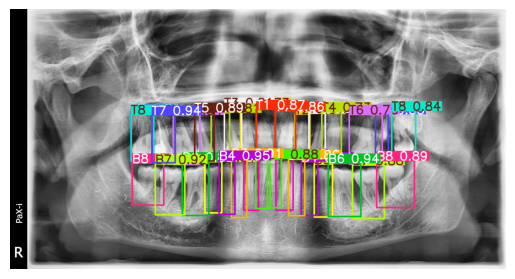

In [ ]:
results3 = model_combined(image_path)
plt.imshow(results3[0].plot())
plt.axis("off")
plt.show()

In [ ]:
threshold = 0.55
filtered_boxes3 = [box for box in results3[0].boxes if box.conf > threshold]

## Performance Evaluation

In [ ]:
metrics4 = model_combined.val(data=config_path, split="test")


Ultralytics 8.3.84 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)


val: Scanning /content/gdrive/MyDrive/Dental Project/combined/test/labels... 21 images, 0 backgrounds, 0 corrupt: 100%|██████████| 21/21 [00:00<00:00, 225.60it/s]

val: New cache created: /content/gdrive/MyDrive/Dental Project/combined/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.21s/it]


                   all         21        576      0.962      0.958      0.989      0.764
                    T1         21         42       0.93          1      0.995      0.729
                    T2         20         40      0.964       0.95       0.99      0.678
                    T3         21         41          1      0.941      0.992      0.773
                    T4         20         37      0.993          1      0.995      0.717
                    T5         20         34          1      0.936      0.992      0.779
                    T6         17         29      0.984          1      0.995      0.785
                    T7         21         37      0.902          1       0.98       0.81
                    T8         13         20          1       0.87      0.995      0.677
                    B1         21         42      0.959      0.976      0.991      0.692
                    B2         21         42      0.976       0.96      0.992      0.701
                    B

In [ ]:
evaluation_metrics(metrics4)

mAP@50: 0.9891
mAP@75: 0.9431
mAP@50-95: 0.7639
Precision: 0.9623
Recall: 0.9582


In [ ]:
per_class_evaluation_metrics(metrics4)

*Class: T1
   - AP@50: 0.9950
   - Precision: 0.9299
   - Recall: 1.0000
*Class: T2
   - AP@50: 0.9900
   - Precision: 0.9636
   - Recall: 0.9500
*Class: T3
   - AP@50: 0.9924
   - Precision: 1.0000
   - Recall: 0.9409
*Class: T4
   - AP@50: 0.9950
   - Precision: 0.9926
   - Recall: 1.0000
*Class: T5
   - AP@50: 0.9917
   - Precision: 1.0000
   - Recall: 0.9359
*Class: T6
   - AP@50: 0.9950
   - Precision: 0.9838
   - Recall: 1.0000
*Class: T7
   - AP@50: 0.9803
   - Precision: 0.9025
   - Recall: 1.0000
*Class: T8
   - AP@50: 0.9950
   - Precision: 1.0000
   - Recall: 0.8697
*Class: B1
   - AP@50: 0.9912
   - Precision: 0.9590
   - Recall: 0.9762
*Class: B2
   - AP@50: 0.9916
   - Precision: 0.9758
   - Recall: 0.9595
*Class: B3
   - AP@50: 0.9950
   - Precision: 0.9492
   - Recall: 1.0000
*Class: B4
   - AP@50: 0.9938
   - Precision: 0.9748
   - Recall: 0.9922
*Class: B5
   - AP@50: 0.9936
   - Precision: 1.0000
   - Recall: 0.9293
*Class: B6
   - AP@50: 0.9931
   - Precision: 0.919

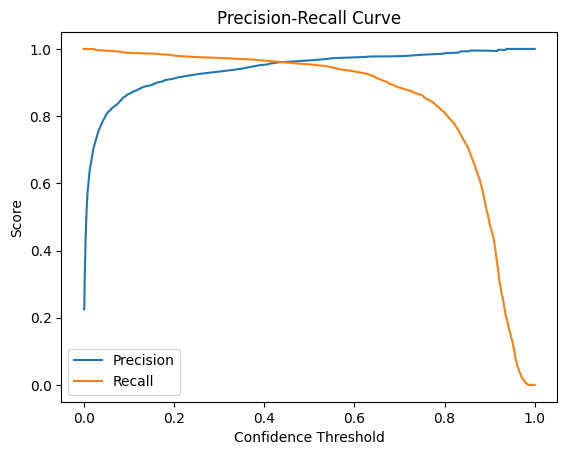

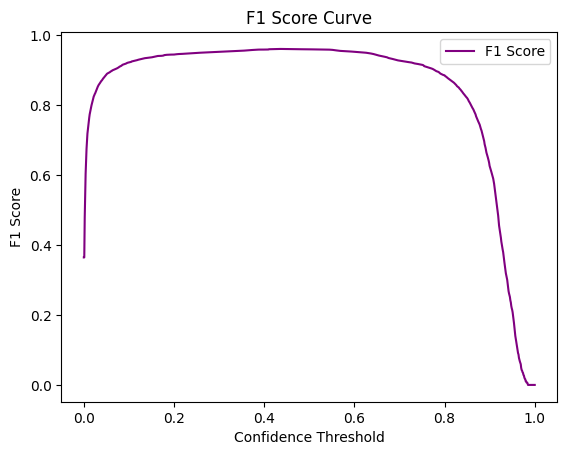

In [ ]:
plot_metrics(metrics4)

# Converting to CSV

In [ ]:
def yolo_to_absolute(image_path, x_center, y_center, width, height):
    img = cv2.imread(image_path)
    h, w, _ = img.shape  # Get image dimensions

    x_min = int((x_center - width / 2) * w)
    y_min = int((y_center - height / 2) * h)
    x_max = int((x_center + width / 2) * w)
    y_max = int((y_center + height / 2) * h)

    return x_min, y_min, x_max, y_max

def from_yolo_to_csv(dataset_path):
  class_names = ["Caries", "Pulpitis", "Periodontitis", "Unknown", "Treated", "Healthy", "Prothesis"]
  labels_path = os.path.join(dataset_path, "labels")
  images_path = os.path.join(dataset_path, "images")
  output_csv = os.path.join(dataset_path, "train.csv")

  label_files = [f for f in os.listdir(labels_path) if f.endswith(".txt")]
  data = []

  for label_file in label_files:
      image_name = label_file.replace(".txt", ".png")
      image_path = os.path.join(images_path, image_name)

      with open(os.path.join(labels_path, label_file), "r") as f:
          for line in f:
              values = line.strip().split()
              class_id = int(values[0])
              x_center, y_center, width, height = map(float, values[1:])
              data.append([image_path, x_center, y_center, width, height, class_id])
  df = pd.DataFrame(data, columns=["image_path","x_center", "y_center", "width", "height", "class_id"])
  df[["x_min", "y_min", "x_max", "y_max"]] = df.apply(
    lambda row: yolo_to_absolute(row["image_path"], row["x_center"], row["y_center"], row["width"], row["height"]),
    axis=1, result_type="expand"
  )
  df_new = df[["image_path","x_min", "y_min", "x_max", "y_max","class_id"]]
  return df_new


In [ ]:
dataset_path = "/content/gdrive/My Drive/Dental Project/dental_pathologies/train"
labels_path = os.path.join(dataset_path, "labels")
images_path = os.path.join(dataset_path, "images")
output_csv = os.path.join(dataset_path, "train.csv")

label_files = [f for f in os.listdir(labels_path) if f.endswith(".txt")]
data = []

for label_file in label_files:
    image_name = label_file.replace(".txt", ".png")
    image_path = os.path.join(images_path, image_name)

    with open(os.path.join(labels_path, label_file), "r") as f:
        for line in f:
            values = line.strip().split()
            class_id = int(values[0])
            x_center, y_center, width, height = map(float, values[1:])
            data.append([image_path, x_center, y_center, width, height, class_id])

df = pd.DataFrame(data, columns=["image_path","x_center", "y_center", "width", "height", "class_id"])


In [ ]:
df

,image_path,x_center,y_center,width,height,class_id
0,/content/gdrive/My Drive/Dental Project/dental...,0.347334,0.669538,0.092054,0.207041,4
1,/content/gdrive/My Drive/Dental Project/dental...,0.302486,0.642533,0.084184,0.189043,4
2,/content/gdrive/My Drive/Dental Project/dental...,0.788717,0.631277,0.103068,0.163537,5
3,/content/gdrive/My Drive/Dental Project/dental...,0.628215,0.709295,0.049568,0.232553,5
4,/content/gdrive/My Drive/Dental Project/dental...,0.592022,0.722048,0.040126,0.231051,5
...,...,...,...,...,...,...
18649,/content/gdrive/My Drive/Dental Project/dental...,0.434307,0.455691,0.047208,0.244894,4
18650,/content/gdrive/My Drive/Dental Project/dental...,0.406771,0.475974,0.045630,0.228371,5
18651,/content/gdrive/My Drive/Dental Project/dental...,0.379234,0.468461,0.040912,0.231376,5
18652,/content/gdrive/My Drive/Dental Project/dental...,0.290327,0.486493,0.055077,0.204328,5


In [ ]:
def yolo_to_absolute(image_path, x_center, y_center, width, height):
    img = cv2.imread(image_path)
    h, w, _ = img.shape  # Get image dimensions

    x_min = int((x_center - width / 2) * w)
    y_min = int((y_center - height / 2) * h)
    x_max = int((x_center + width / 2) * w)
    y_max = int((y_center + height / 2) * h)

    return x_min, y_min, x_max, y_max

df[["x_min", "y_min", "x_max", "y_max"]] = df.apply(
    lambda row: yolo_to_absolute(row["image_path"], row["x_center"], row["y_center"], row["width"], row["height"]),
    axis=1, result_type="expand"
)


In [ ]:
df_new = df[["image_path","x_min", "y_min", "x_max", "y_max","class_id"]]

annotations_path = os.path.join(dataset_path, "annotations")
os.makedirs(annotations_path, exist_ok=True)
df_new.to_csv(os.path.join(annotations_path, "train.csv"), index=False, header=False)


In [ ]:
df_new

,image_path,x_min,y_min,x_max,y_max,class_id
0,/content/gdrive/My Drive/Dental Project/dental...,864,851,1128,1162,4
1,/content/gdrive/My Drive/Dental Project/dental...,746,824,988,1108,4
2,/content/gdrive/My Drive/Dental Project/dental...,2114,826,2409,1072,5
3,/content/gdrive/My Drive/Dental Project/dental...,1730,891,1872,1241,5
4,/content/gdrive/My Drive/Dental Project/dental...,1640,912,1755,1259,5
...,...,...,...,...,...,...
18649,/content/gdrive/My Drive/Dental Project/dental...,1179,501,1315,869,4
18650,/content/gdrive/My Drive/Dental Project/dental...,1102,544,1233,887,5
18651,/content/gdrive/My Drive/Dental Project/dental...,1030,530,1147,878,5
18652,/content/gdrive/My Drive/Dental Project/dental...,754,578,912,885,5


In [ ]:
data_classes = {'class_name': ["Caries", "Pulpitis", "Periodontitis", "Unknown","Treated", "Healthy", "Prosthesis"], 'class_id': [0, 1, 2, 3, 4, 5, 6]}
df_classes = pd.DataFrame.from_dict(data_classes)
df_classes.to_csv(os.path.join(annotations_path, "classes.csv"), index=False, header=False)


In [ ]:
df_classes

,class_name,class_id
0,Caries,0
1,Pulpitis,1
2,Periodontitis,2
3,Unknown,3
4,Treated,4
5,Healthy,5
6,Prothesis,6


### Checking CSV Dataset

here


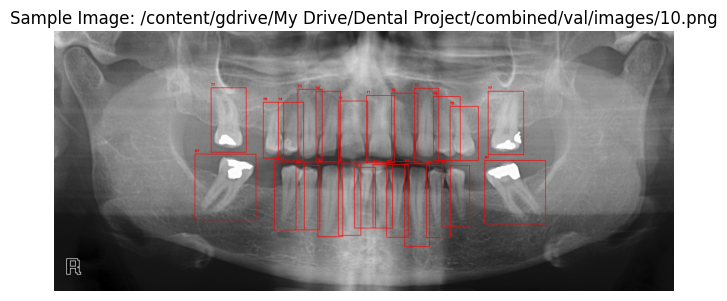

In [ ]:
import pandas as pd
import cv2
import random
import matplotlib.pyplot as plt

csv_path = "/content/gdrive/My Drive/Dental Project/combined/val/annotations/val.csv"
df = pd.read_csv(csv_path, header=None, names=["filename", "xmin", "ymin", "xmax", "ymax", "label"])

random_image_name = random.choice(df["filename"].unique())

image_data = df[df["filename"] == random_image_name]

image_path = f"{random_image_name}"
image = cv2.imread(image_path)


if image is None:
    print(f"Error: Image '{random_image_name}' not found in the specified folder.")
else:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    for _, row in image_data.iterrows():
        xmin, ymin, xmax, ymax, label = row["xmin"], row["ymin"], row["xmax"], row["ymax"], row["label"]
        cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)  # Blue box
        cv2.putText(image, label, (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    plt.figure(figsize=(8, 8))
    print("here")
    plt.imshow(image)
    plt.axis("off")
    plt.title(f"Sample Image: {random_image_name}")
    plt.show()


# For Validation

In [ ]:
dataset_path = "/content/gdrive/My Drive/Dental Project/dental_pathologies/val"
df_val = from_yolo_to_csv(dataset_path)

In [ ]:
df_val

,image_path,x_min,y_min,x_max,y_max,class_id
0,/content/gdrive/My Drive/Dental Project/dental...,768,910,996,1183,4
1,/content/gdrive/My Drive/Dental Project/dental...,634,883,869,1154,4
2,/content/gdrive/My Drive/Dental Project/dental...,806,634,958,912,4
3,/content/gdrive/My Drive/Dental Project/dental...,671,623,820,894,4
4,/content/gdrive/My Drive/Dental Project/dental...,1929,905,2173,1199,4
...,...,...,...,...,...,...
2178,/content/gdrive/My Drive/Dental Project/dental...,1798,621,1920,930,5
2179,/content/gdrive/My Drive/Dental Project/dental...,1890,634,2051,918,5
2180,/content/gdrive/My Drive/Dental Project/dental...,834,569,967,873,0
2181,/content/gdrive/My Drive/Dental Project/dental...,731,555,870,853,0


In [ ]:
class_map = {
    0: "Caries",
    1: "Pulpitis",
    2: "Periodontitis",
    3: "Unknown",
    4: "Treated",
    5: "Healthy",
    6: "Prosthesis"
}
df_val["class_id"] = df_val["class_id"].map(class_map)
annotations_path = os.path.join(dataset_path, "annotations")
os.makedirs(annotations_path, exist_ok=True)
df_val.to_csv(os.path.join(annotations_path, "val.csv"), index=False, header=False)

## For Testing

In [ ]:
dataset_path = "/content/gdrive/My Drive/Dental Project/dental_pathologies/test"
df_test = from_yolo_to_csv(dataset_path)

In [ ]:
class_map = {
    0: "Caries",
    1: "Pulpitis",
    2: "Periodontitis",
    3: "Unknown",
    4: "Treated",
    5: "Healthy",
    6: "Prosthesis"
}
df_test["class_id"] = df_test["class_id"].map(class_map)
annotations_path = os.path.join(dataset_path, "annotations")
os.makedirs(annotations_path, exist_ok=True)
df_test.to_csv(os.path.join(annotations_path, "test.csv"), index=False)

In [ ]:
df_test.to_csv(os.path.join(annotations_path, "test.csv"), index=False, header=False)

In [ ]:
df_test

,image_path,x_min,y_min,x_max,y_max,class_id
0,/content/gdrive/My Drive/Dental Project/dental...,2004,566,2146,887,Treated
1,/content/gdrive/My Drive/Dental Project/dental...,822,853,1082,1131,Treated
2,/content/gdrive/My Drive/Dental Project/dental...,788,541,901,815,Healthy
3,/content/gdrive/My Drive/Dental Project/dental...,1127,840,1254,1167,Healthy
4,/content/gdrive/My Drive/Dental Project/dental...,1231,837,1333,1172,Healthy
...,...,...,...,...,...,...
2227,/content/gdrive/My Drive/Dental Project/dental...,1507,903,1608,1176,Healthy
2228,/content/gdrive/My Drive/Dental Project/dental...,1423,898,1561,1192,Healthy
2229,/content/gdrive/My Drive/Dental Project/dental...,1326,900,1450,1201,Healthy
2230,/content/gdrive/My Drive/Dental Project/dental...,1231,867,1403,1239,Healthy


## For Tooth labeling

In [ ]:
dataset_path = "/content/gdrive/My Drive/Dental Project/combined/train"
df_combined = from_yolo_to_csv(dataset_path)

In [ ]:
class_map = {
    0: "T1",
    1: "T2",
    2: "T3",
    3: "T4",
    4: "T5",
    5: "T6",
    6: "T7",
    7: "T8",
    8: "B1",
    9: "B2",
    10: "B3",
    11: "B4",
    12: "B5",
    13: "B6",
    14: "B7",
    15: "B8"
}
df_combined["class_id"] = df_combined["class_id"].map(class_map)
annotations_path = os.path.join(dataset_path, "annotations")
os.makedirs(annotations_path, exist_ok=True)
df_combined.to_csv(os.path.join(annotations_path, "train.csv"), index=False, header=False)

In [ ]:
dataset_path = "/content/gdrive/My Drive/Dental Project/combined/val"
df_combined = from_yolo_to_csv(dataset_path)
class_map = {
    0: "T1",
    1: "T2",
    2: "T3",
    3: "T4",
    4: "T5",
    5: "T6",
    6: "T7",
    7: "T8",
    8: "B1",
    9: "B2",
    10: "B3",
    11: "B4",
    12: "B5",
    13: "B6",
    14: "B7",
    15: "B8"
}
df_combined["class_id"] = df_combined["class_id"].map(class_map)
annotations_path = os.path.join(dataset_path, "annotations")
os.makedirs(annotations_path, exist_ok=True)
df_combined.to_csv(os.path.join(annotations_path, "val.csv"), index=False, header=False)

In [ ]:
dataset_path = "/content/gdrive/My Drive/Dental Project/combined/test"
df_combined = from_yolo_to_csv(dataset_path)
class_map = {
    0: "T1",
    1: "T2",
    2: "T3",
    3: "T4",
    4: "T5",
    5: "T6",
    6: "T7",
    7: "T8",
    8: "B1",
    9: "B2",
    10: "B3",
    11: "B4",
    12: "B5",
    13: "B6",
    14: "B7",
    15: "B8"
}
df_combined["class_id"] = df_combined["class_id"].map(class_map)
annotations_path = os.path.join(dataset_path, "annotations")
os.makedirs(annotations_path, exist_ok=True)
df_combined.to_csv(os.path.join(annotations_path, "test.csv"), index=False, header=False)

# RetinaNet

In [ ]:
import torch
import torchvision
import pandas as pd
import cv2
import os
import numpy as np
import random
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import functional as F
import matplotlib.patches as patches

In [ ]:
BATCH_SIZE = 8
EPOCHS = 20
LR = 0.0001
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")


class CustomDentalDataset(Dataset):
    def __init__(self, csv_file, image_folder, transforms=None):
        self.data = pd.read_csv(csv_file, header=None, names=["filename", "xmin", "ymin", "xmax", "ymax", "label"])
        self.image_folder = image_folder
        self.transforms = transforms
        self.classes = {label: idx for idx, label in enumerate(self.data["label"].unique(), start=1)}

    def __len__(self):
        return len(self.data["filename"].unique())

    def __getitem__(self, idx):
        img_name = self.data["filename"].unique()[idx]
        img_path = os.path.join(self.image_folder, img_name)

        image = cv2.imread(img_path)
        if image is None:
            print(f"Error loading image {img_path}")
            return None
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        records = self.data[self.data["filename"] == img_name]
        boxes = records[["xmin", "ymin", "xmax", "ymax"]].values
        labels = [self.classes[label] for label in records["label"]]

        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        labels = torch.as_tensor(labels, dtype=torch.int64)

        image = torch.tensor(image, dtype=torch.float32).permute(2, 0, 1) / 255.0  # Normalize

        target = {"boxes": boxes, "labels": labels}

        return image, target


train_dataset = CustomDentalDataset(
    csv_file="/content/gdrive/MyDrive/Dental Project/dental_pathologies/train/annotations/annotations/train_fixed.csv",
    image_folder="/content/gdrive/MyDrive/Dental Project/dental_pathologies/train/images"
)

val_dataset = CustomDentalDataset(
    csv_file="/content/gdrive/MyDrive/Dental Project/dental_pathologies/val/annotations/val.csv",
    image_folder="/content/gdrive/MyDrive/Dental Project/dental_pathologies/val/images"
)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=lambda batch: tuple(zip(*batch)))
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, collate_fn=lambda batch: tuple(zip(*batch)))



from torchvision.models.detection.retinanet import RetinaNetClassificationHead

def get_model(num_classes):
    model = torchvision.models.detection.retinanet_resnet50_fpn(pretrained=True)

    in_channels = model.head.classification_head.cls_logits.in_channels
    num_anchors = model.head.classification_head.num_anchors  # Get number of anchors

    model.head.classification_head = RetinaNetClassificationHead(
        in_channels=in_channels, num_anchors=num_anchors, num_classes=num_classes
    )

    model.num_classes = num_classes

    return model

num_classes = len(train_dataset.classes) + 1  # +1 for background
model = get_model(num_classes).to(DEVICE)

print(f"Model initialized with {num_classes} classes.")





num_classes = len(train_dataset.classes) + 1  # +1 for background
model = get_model(num_classes).to(DEVICE)


optimizer = torch.optim.Adam(model.parameters(), lr=LR)

def train_one_epoch(model, data_loader, optimizer, device):
    model.train()
    total_loss = 0
    for images, targets in data_loader:
        images = list(img.to(device) for img in images)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        loss_dict = model(images, targets)
        losses = sum(loss for loss in loss_dict.values())

        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

        total_loss += losses.item()

    return total_loss / len(data_loader)

def validate(model, data_loader, device):
    model.train()
    total_loss = 0
    with torch.no_grad():
        for images, targets in data_loader:
            images = list(img.to(device) for img in images)
            targets = [{k: v.to(device) for k, v in t.items()} for t in targets]


            loss_dict = model(images, targets)
            losses = sum(loss for loss in loss_dict.values())
            total_loss += losses.item()

    return total_loss / len(data_loader)


best_val_loss = float("inf")
patience = 5
counter = 0
for epoch in range(EPOCHS):
    train_loss = train_one_epoch(model, train_loader, optimizer, DEVICE)
    val_loss = validate(model, val_loader, DEVICE)
    print(f"Epoch [{epoch+1}/{EPOCHS}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        counter = 0
        torch.save(model.state_dict(), "best_retinanet_dental.pth")
        print("Model saved as best_retinanet_dental.pth")
    else:
        counter += 1
        if counter >= patience:
            print(f"Early stopping at epoch {epoch+1}. No improvement in {patience} epochs.")
            break


torch.save(model.state_dict(), "retinanet_dental.pth")
print("Model saved as retinanet_dental.pth")


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=RetinaNet_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=RetinaNet_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/retinanet_resnet50_fpn_coco-eeacb38b.pth" to /root/.cache/torch/hub/checkpoints/retinanet_resnet50_fpn_coco-eeacb38b.pth
100%|██████████| 130M/130M [00:01<00:00, 91.4MB/s]


Model initialized with 8 classes.
Epoch [1/20], Train Loss: 0.5976, Val Loss: 0.4257
Model saved as best_retinanet_dental.pth
Epoch [2/20], Train Loss: 0.3987, Val Loss: 0.3788
Model saved as best_retinanet_dental.pth
Epoch [3/20], Train Loss: 0.3509, Val Loss: 0.3615
Model saved as best_retinanet_dental.pth
Epoch [4/20], Train Loss: 0.3083, Val Loss: 0.3200
Model saved as best_retinanet_dental.pth
Epoch [5/20], Train Loss: 0.2721, Val Loss: 0.3408
Epoch [6/20], Train Loss: 0.2512, Val Loss: 0.3348
Epoch [7/20], Train Loss: 0.2312, Val Loss: 0.3158
Model saved as best_retinanet_dental.pth
Epoch [8/20], Train Loss: 0.2078, Val Loss: 0.3465
Epoch [9/20], Train Loss: 0.1921, Val Loss: 0.3584
Epoch [10/20], Train Loss: 0.1850, Val Loss: 0.3541
Epoch [11/20], Train Loss: 0.1633, Val Loss: 0.3780
Epoch [12/20], Train Loss: 0.1491, Val Loss: 0.4168
Early stopping at epoch 12. No improvement in 5 epochs.
Model saved as retinanet_dental.pth


In [ ]:
from sklearn.metrics import precision_recall_curve, auc
from torchvision.models.detection.retinanet import RetinaNetClassificationHead

BATCH_SIZE = 1
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class CustomDentalDataset(Dataset):
    def __init__(self, csv_file, image_folder):
        self.data = pd.read_csv(csv_file, header=None, names=["filename", "xmin", "ymin", "xmax", "ymax", "label"])
        self.image_folder = image_folder
        self.classes = {label: idx for idx, label in enumerate(self.data["label"].unique(), start=1)}

    def __len__(self):
        return len(self.data["filename"].unique())

    def __getitem__(self, idx):
        img_name = self.data["filename"].unique()[idx]
        img_path = os.path.join(self.image_folder, img_name)

        if not os.path.exists(img_path):
            print(f"Warning: Image {img_path} not found. Skipping.")
            return None

        image = cv2.imread(img_path)
        if image is None:
            print(f"Error loading image {img_path}. Skipping.")
            return None

        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        records = self.data[self.data["filename"] == img_name]
        boxes = records[["xmin", "ymin", "xmax", "ymax"]].values
        labels = [self.classes[label] for label in records["label"]]

        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        labels = torch.as_tensor(labels, dtype=torch.int64)

        image = torch.tensor(image, dtype=torch.float32).permute(2, 0, 1) / 255.0

        target = {"boxes": boxes, "labels": labels}

        return image, target, img_name


TEST_CSV = "/content/gdrive/My Drive/Dental Project/dental_pathologies/test/annotations/test.csv"
TEST_IMAGES_FOLDER = "/content/gdrive/My Drive/Dental Project/dental_pathologies/test/images"

test_dataset = CustomDentalDataset(csv_file=TEST_CSV, image_folder=TEST_IMAGES_FOLDER)

filtered_test_dataset = [item for item in test_dataset if item is not None]
test_loader = DataLoader(filtered_test_dataset, batch_size=1, shuffle=False)


def get_model(num_classes):
    model = torchvision.models.detection.retinanet_resnet50_fpn(pretrained=False)
    in_channels = model.head.classification_head.cls_logits.in_channels
    num_anchors = model.head.classification_head.num_anchors
    model.head.classification_head = RetinaNetClassificationHead(
        in_channels=in_channels, num_anchors=num_anchors, num_classes=num_classes
    )
    model.num_classes = num_classes
    return model

num_classes = len(test_dataset.classes) + 1  # +1 for background
model = get_model(num_classes).to(DEVICE)
model.load_state_dict(torch.load("/content/gdrive/My Drive/Dental Project/best_retinanet_dental.pth", map_location=DEVICE))
model.eval()



/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


RetinaNet(
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=1e-05)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=1e-05)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=1e-05)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=1e-05)
          (relu): ReLU(inplace=True)
          (downsample): Sequential(
            (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): FrozenBatchNorm2d(256, e

In [ ]:
def show_performance_on_image(image_path, model, device):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error loading image {image_path}.")
        return

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    image_tensor = torch.tensor(image_rgb, dtype=torch.float32).permute(2, 0, 1) / 255.0
    image_tensor = image_tensor.unsqueeze(0).to(device)  # Add batch dimension and move to device

    with torch.no_grad():
        prediction = model(image_tensor)

    boxes = prediction[0]['boxes'].cpu().numpy()
    labels = prediction[0]['labels'].cpu().numpy()
    scores = prediction[0]['scores'].cpu().numpy()
    threshold = 0.4
    keep_indices = scores >= threshold
    filtered_boxes = boxes[keep_indices]
    filtered_labels = labels[keep_indices]
    fig, ax = plt.subplots(1, figsize=(12, 12))
    ax.imshow(image_rgb)

    for box, label in zip(filtered_boxes, filtered_labels):
        xmin, ymin, xmax, ymax = box
        label_name = list(test_dataset.classes.keys())[label - 1]
        rect = patches.Rectangle(
            (xmin, ymin), xmax - xmin, ymax - ymin, linewidth=2, edgecolor='r', facecolor='none'
        )
        ax.add_patch(rect)
        ax.text(xmin, ymin, label_name, fontsize=12, color='r', backgroundcolor='white')
    plt.axis('off')
    plt.show()
image_path = '/content/gdrive/My Drive/Dental Project/dental_pathologies/test/images/P20181109_181347_0000.png'
show_performance_on_image(image_path, model, DEVICE)

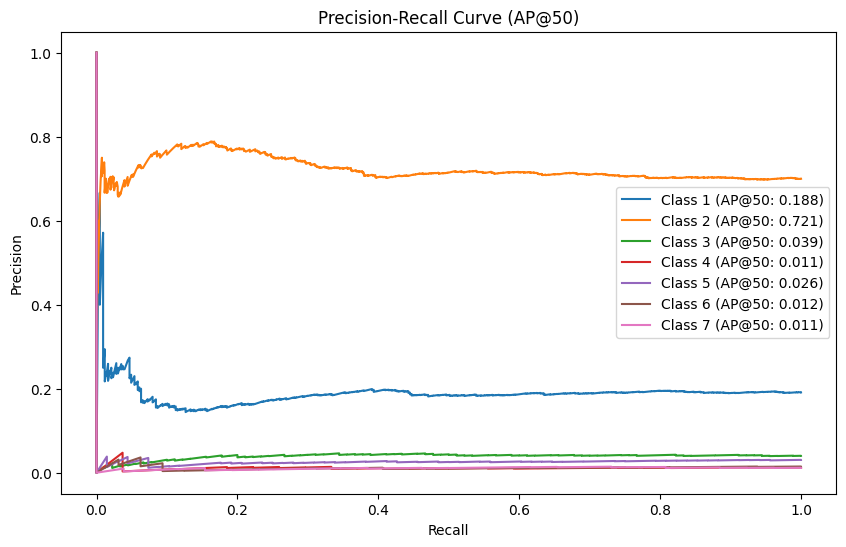

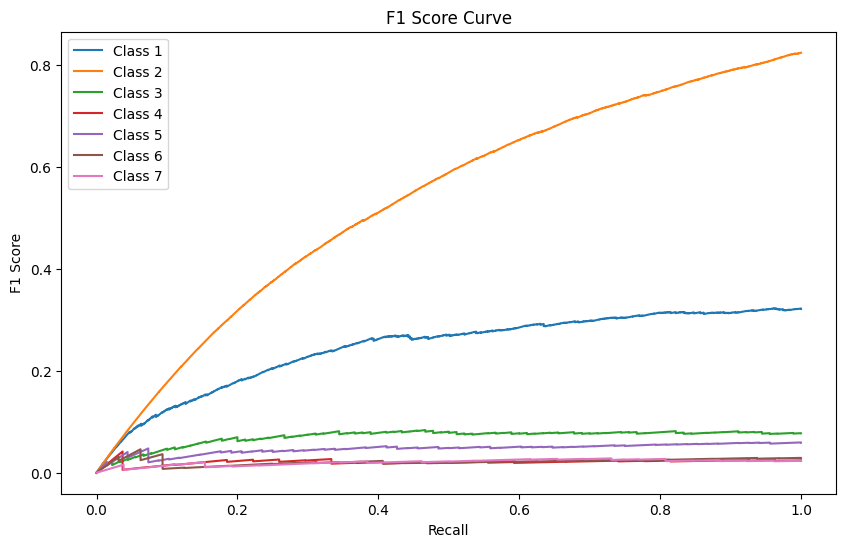

Class 1: AP@50 = 0.188
Class 2: AP@50 = 0.721
Class 3: AP@50 = 0.039
Class 4: AP@50 = 0.011
Class 5: AP@50 = 0.026
Class 6: AP@50 = 0.012
Class 7: AP@50 = 0.011

✅ Overall Model Performance:
Precision: 0.711
Recall: 0.777
F1 Score: 0.743


In [ ]:

def filter_results(model, data_loader, device, score_threshold=0.5):
    model.eval()
    filtered_results = []

    with torch.no_grad():
        for images, targets, img_name in data_loader:
            images = list(img.to(device) for img in images)
            predictions = model(images)[0]

            actual_labels = targets["labels"].cpu().numpy()
            predicted_labels = predictions["labels"].cpu().numpy()
            predicted_scores = predictions["scores"].cpu().numpy()
            predicted_boxes = predictions["boxes"].cpu().numpy()

            high_confidence_indices = np.where(predicted_scores >= score_threshold)[0]
            predicted_labels = predicted_labels[high_confidence_indices]
            predicted_scores = predicted_scores[high_confidence_indices]
            predicted_boxes = predicted_boxes[high_confidence_indices]

            if len(actual_labels) > 0 and len(predicted_labels) > 0:
                filtered_results.append({
                    "img_name": img_name,
                    "actual_labels": actual_labels,
                    "predicted_labels": predicted_labels,
                    "predicted_scores": predicted_scores,
                    "predicted_boxes": predicted_boxes
                })

    return filtered_results

# Run filtering
filtered_results = filter_results(model, test_loader, DEVICE, score_threshold=0.4)



def compute_precision_recall(filtered_results):

    class_metrics = {label: {"TP": 0, "FP": 0, "FN": 0, "scores": [], "gt": []} for label in range(1, num_classes)}

    for result in filtered_results:
        actual_labels = result["actual_labels"]
        predicted_labels = result["predicted_labels"]
        predicted_scores = result["predicted_scores"]

        for label in range(1, num_classes):
            gt_count = np.sum(actual_labels == label)
            pred_count = np.sum(predicted_labels == label)

            actual_labels = np.array(actual_labels).flatten().tolist()
            predicted_labels = np.array(predicted_labels).flatten().tolist()

            actual_labels_set = set(actual_labels)
            predicted_labels_set = set(predicted_labels)


            TP = len(actual_labels_set & predicted_labels_set)  # Intersection = Correct matches
            FP = len(predicted_labels_set - actual_labels_set)  # Predicted but not in actual
            FN = len(actual_labels_set - predicted_labels_set)

            class_metrics[label]["TP"] += TP
            class_metrics[label]["FP"] += FP
            class_metrics[label]["FN"] += FN
            class_metrics[label]["scores"].extend(predicted_scores)
            class_metrics[label]["gt"].extend([1 if gt == label else 0 for gt in actual_labels])



    precision_recall_results = {}
    for label in range(1, num_classes):
        y_true = np.array(class_metrics[label]["gt"])
        y_scores = np.array(class_metrics[label]["scores"])

        min_len = min(len(y_true), len(y_scores))
        if min_len == 0:
            continue

        y_true = y_true[:min_len]
        y_scores = y_scores[:min_len]

        precision, recall, _ = precision_recall_curve(y_true, y_scores)
        ap50 = auc(recall, precision)

        f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)

        precision_recall_results[label] = {
            "precision": precision,
            "recall": recall,
            "f1_scores": f1_scores,
            "AP@50": ap50
        }

    return precision_recall_results, class_metrics

# Run evaluation
precision_recall_results, class_metrics = compute_precision_recall(filtered_results)


plt.figure(figsize=(10, 6))
for label, metrics in precision_recall_results.items():
    plt.plot(metrics["recall"], metrics["precision"], label=f"Class {label} (AP@50: {metrics['AP@50']:.3f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (AP@50)")
plt.legend()
plt.show()


plt.figure(figsize=(10, 6))
for label, metrics in precision_recall_results.items():
    plt.plot(metrics["recall"], metrics["f1_scores"], label=f"Class {label}")

plt.xlabel("Recall")
plt.ylabel("F1 Score")
plt.title("F1 Score Curve")
plt.legend()
plt.show()


for label, metrics in precision_recall_results.items():
    print(f"Class {label}: AP@50 = {metrics['AP@50']:.3f}")


total_TP = sum(class_metrics[label]["TP"] for label in class_metrics)
total_FP = sum(class_metrics[label]["FP"] for label in class_metrics)
total_FN = sum(class_metrics[label]["FN"] for label in class_metrics)

overall_precision = total_TP / (total_TP + total_FP) if (total_TP + total_FP) > 0 else 0
overall_recall = total_TP / (total_TP + total_FN) if (total_TP + total_FN) > 0 else 0
overall_f1 = 2 * (overall_precision * overall_recall) / (overall_precision + overall_recall + 1e-6)

print(f"\n✅ Overall Model Performance:")
print(f"Precision: {overall_precision:.3f}")
print(f"Recall: {overall_recall:.3f}")
print(f"F1 Score: {overall_f1:.3f}")


In [ ]:
test_dataset.classes

{'Treated': 1,
 'Healthy': 2,
 'Caries': 3,
 'Unknown': 4,
 'Periodontitis': 5,
 'Prothesis': 6,
 'Pulpitis': 7}

## Tooth labeling

In [ ]:
train_dataset.classes

{'class_id': 1,
 'T5': 2,
 'T4': 3,
 'T3': 4,
 'T2': 5,
 'T1': 6,
 'T8': 7,
 'T7': 8,
 'T6': 9,
 'B6': 10,
 'B7': 11,
 'B8': 12,
 'B1': 13,
 'B2': 14,
 'B5': 15,
 'B4': 16,
 'B3': 17}

In [ ]:
BATCH_SIZE = 4
EPOCHS = 50
LR = 0.0001
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")


class CustomDentalDataset(Dataset):
    def __init__(self, csv_file, image_folder, transforms=None):
        self.data = pd.read_csv(csv_file, header=None, names=["filename", "xmin", "ymin", "xmax", "ymax", "label"])
        self.image_folder = image_folder
        self.transforms = transforms
        self.classes = {label: idx for idx, label in enumerate(self.data["label"].unique(), start=1)}

    def __len__(self):
        return len(self.data["filename"].unique())

    def __getitem__(self, idx):
        img_name = self.data["filename"].unique()[idx]
        img_path = os.path.join(self.image_folder, img_name)

        image = cv2.imread(img_path)
        if image is None:
            print(f"Error loading image {img_path}")
            return None
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        records = self.data[self.data["filename"] == img_name]
        boxes = records[["xmin", "ymin", "xmax", "ymax"]].values
        labels = [self.classes[label] for label in records["label"]]

        boxes = records[["xmin", "ymin", "xmax", "ymax"]].apply(pd.to_numeric, errors="coerce").values
        boxes = np.nan_to_num(boxes, nan=0.0)

        labels = torch.as_tensor(labels, dtype=torch.int64)

        image = torch.tensor(image, dtype=torch.float32).permute(2, 0, 1) / 255.0  # Normalize

        target = {"boxes": boxes, "labels": labels}

        return image, target


train_dataset = CustomDentalDataset(
    csv_file="/content/gdrive/MyDrive/Dental Project/combined/train/annotations/train.csv",
    image_folder="/content/gdrive/MyDrive/Dental Project/combined/train/images"
)

val_dataset = CustomDentalDataset(
    csv_file="/content/gdrive/MyDrive/Dental Project/combined/val/annotations/val.csv",
    image_folder="/content/gdrive/MyDrive/Dental Project/combined/val/images"
)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=lambda batch: tuple(zip(*batch)))
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, collate_fn=lambda batch: tuple(zip(*batch)))



from torchvision.models.detection.retinanet import RetinaNetClassificationHead

def get_model(num_classes):
    model = torchvision.models.detection.retinanet_resnet50_fpn(pretrained=True)

    in_channels = model.head.classification_head.cls_logits.in_channels
    num_anchors = model.head.classification_head.num_anchors

    model.head.classification_head = RetinaNetClassificationHead(
        in_channels=in_channels, num_anchors=num_anchors, num_classes=num_classes
    )

    model.num_classes = num_classes

    return model

num_classes = len(train_dataset.classes) + 1
model = get_model(num_classes).to(DEVICE)

print(f"Model initialized with {num_classes} classes.")





num_classes = len(train_dataset.classes) + 1
model = get_model(num_classes).to(DEVICE)


optimizer = torch.optim.Adam(model.parameters(), lr=LR)

def train_one_epoch(model, data_loader, optimizer, device):
    model.train()
    total_loss = 0
    for images, targets in data_loader:
        images = list(img.to(device) for img in images)
        targets = [
           {k: torch.as_tensor(v, dtype=torch.float32 if "boxes" in k else torch.int64).to(device) for k, v in t.items()}
            for t in targets
        ]


        loss_dict = model(images, targets)
        losses = sum(loss for loss in loss_dict.values())

        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

        total_loss += losses.item()

    return total_loss / len(data_loader)

def validate(model, data_loader, device):
    model.train()
    total_loss = 0
    with torch.no_grad():
        for images, targets in data_loader:
            images = list(img.to(device) for img in images)
            targets = [{k: v.to(device) for k, v in t.items()} for t in targets]


            loss_dict = model(images, targets)
            losses = sum(loss for loss in loss_dict.values())
            total_loss += losses.item()

    return total_loss / len(data_loader)


best_val_loss = float("inf")
patience = 5
counter = 0
for epoch in range(EPOCHS):
    train_loss = train_one_epoch(model, train_loader, optimizer, DEVICE)
    val_loss = validate(model, val_loader, DEVICE)
    print(f"Epoch [{epoch+1}/{EPOCHS}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        counter = 0
        torch.save(model.state_dict(), "best_retinanet_labeling.pth")
        print("Model saved as best_retinanet_labeling.pth")
    else:
        counter += 1
        if counter >= patience:
            print(f"Early stopping at epoch {epoch+1}. No improvement in {patience} epochs.")
            break


torch.save(model.state_dict(), "retinanet_dental.pth")
print("Model saved as retinanet_labeling.pth")

In [ ]:
from sklearn.metrics import precision_recall_curve, auc

BATCH_SIZE = 1
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class CustomDentalDataset(Dataset):
    def __init__(self, csv_file, image_folder):
        self.data = pd.read_csv(csv_file, header=None, names=["filename", "xmin", "ymin", "xmax", "ymax", "label"])
        self.image_folder = image_folder
        self.classes = {label: idx for idx, label in enumerate(self.data["label"].unique(), start=1)}

    def __len__(self):
        return len(self.data["filename"].unique())

    def __getitem__(self, idx):
        img_name = self.data["filename"].unique()[idx]
        img_path = os.path.join(self.image_folder, img_name)

        if not os.path.exists(img_path):
            print(f"Warning: Image {img_path} not found. Skipping.")
            return None

        image = cv2.imread(img_path)
        if image is None:
            print(f"Error loading image {img_path}. Skipping.")
            return None

        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        records = self.data[self.data["filename"] == img_name]
        boxes = records[["xmin", "ymin", "xmax", "ymax"]].values
        labels = [self.classes[label] for label in records["label"]]

        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        labels = torch.as_tensor(labels, dtype=torch.int64)

        image = torch.tensor(image, dtype=torch.float32).permute(2, 0, 1) / 255.0

        target = {"boxes": boxes, "labels": labels}

        return image, target, img_name


TEST_CSV = "/content/gdrive/My Drive/Dental Project/combined/test/annotations/test.csv"
TEST_IMAGES_FOLDER = "/content/gdrive/My Drive/Dental Project/combined/test/images"

test_dataset = CustomDentalDataset(csv_file=TEST_CSV, image_folder=TEST_IMAGES_FOLDER)

filtered_test_dataset = [item for item in test_dataset if item is not None]
test_loader = DataLoader(filtered_test_dataset, batch_size=1, shuffle=False)


def get_model(num_classes):
    model = torchvision.models.detection.retinanet_resnet50_fpn(pretrained=False)
    in_channels = model.head.classification_head.cls_logits.in_channels
    num_anchors = model.head.classification_head.num_anchors
    model.head.classification_head = RetinaNetClassificationHead(
        in_channels=in_channels, num_anchors=num_anchors, num_classes=num_classes
    )
    model.num_classes = num_classes
    return model

num_classes = len(test_dataset.classes) + 1  # +1 for background
model = get_model(num_classes).to(DEVICE)
model.load_state_dict(torch.load("/content/gdrive/My Drive/Dental Project/best_retinanet_dental_labeling.pth", map_location=DEVICE))
model.eval()

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 178MB/s]


RetinaNet(
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=1e-05)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=1e-05)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=1e-05)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=1e-05)
          (relu): ReLU(inplace=True)
          (downsample): Sequential(
            (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): FrozenBatchNorm2d(256, e

In [ ]:
TEST_CSV = "/content/gdrive/My Drive/Dental Project/combined/test/annotations/test.csv"
TEST_IMAGES_FOLDER = "/content/gdrive/My Drive/Dental Project/combined/test/images"

test_dataset = CustomDentalDataset(csv_file=TEST_CSV, image_folder=TEST_IMAGES_FOLDER)

filtered_test_dataset = [item for item in test_dataset if item is not None]
test_loader = DataLoader(filtered_test_dataset, batch_size=1, shuffle=False)

112
[ 9  8  9  8  5  5 10  6 11 14 10  6  3 15 10 14 16  1 15  2 13 12  4  3
 16  7 13]


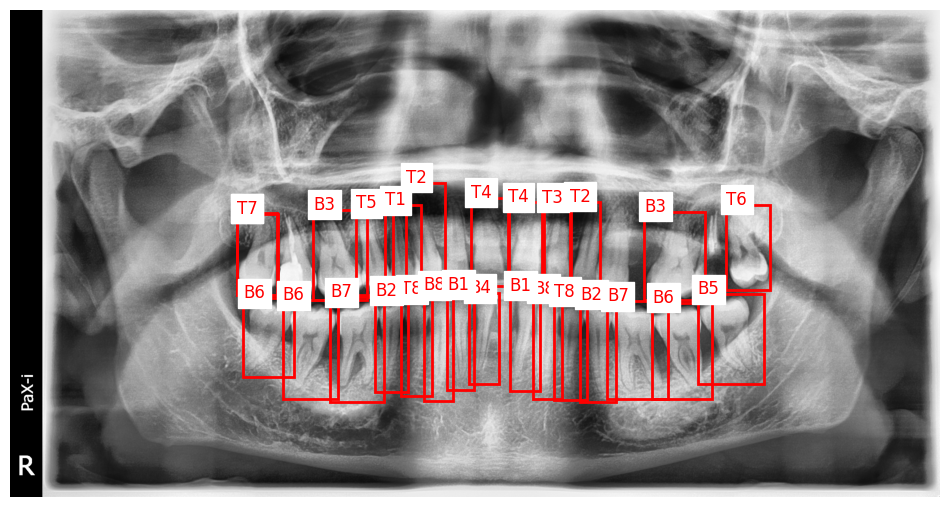

In [ ]:
import torch
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def show_performance_on_image(image_path, model, device):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error loading image {image_path}.")
        return

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    image_tensor = torch.tensor(image_rgb, dtype=torch.float32).permute(2, 0, 1) / 255.0
    image_tensor = image_tensor.unsqueeze(0).to(device)

    with torch.no_grad():
        prediction = model(image_tensor)

    boxes = prediction[0]['boxes'].cpu().numpy()
    labels = prediction[0]['labels'].cpu().numpy()
    scores = prediction[0]['scores'].cpu().numpy()
    print(len(labels))
    threshold = 0.6
    keep_indices = scores >= threshold
    filtered_boxes = boxes[keep_indices]
    filtered_labels = labels[keep_indices]
    print(filtered_labels)
    fig, ax = plt.subplots(1, figsize=(12, 12))
    ax.imshow(image_rgb)

    for box, label in zip(filtered_boxes, filtered_labels):
        xmin, ymin, xmax, ymax = box
        label_name = list(test_dataset.classes.keys())[label - 1]
        rect = patches.Rectangle(
            (xmin, ymin), xmax - xmin, ymax - ymin, linewidth=2, edgecolor='r', facecolor='none'
        )
        ax.add_patch(rect)
        ax.text(xmin, ymin, label_name, fontsize=12, color='r', backgroundcolor='white')
    plt.axis('off')
    plt.show()
image_path = '/content/gdrive/My Drive/Dental Project/dental_pathologies/test/images/P20181109_181347_0000.png'
show_performance_on_image(image_path, model, DEVICE)



In [ ]:
image_path

'/content/gdrive/My Drive/Dental Project/dental_pathologies/test/images/P20181109_181347_0000.png'

In [ ]:
model.eval()

RetinaNet(
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(inplace=True)
          (downsample): Sequential(
            (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): FrozenBatchNorm2d(256, eps=0.0)


In [ ]:
from sklearn.metrics import precision_recall_curve, auc

BATCH_SIZE = 1
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class CustomDentalDataset(Dataset):
    def __init__(self, csv_file, image_folder):
        self.data = pd.read_csv(csv_file, header=None, names=["filename", "xmin", "ymin", "xmax", "ymax", "label"])
        self.image_folder = image_folder
        self.classes = {label: idx for idx, label in enumerate(self.data["label"].unique(), start=1)}

    def __len__(self):
        return len(self.data["filename"].unique())

    def __getitem__(self, idx):
        img_name = self.data["filename"].unique()[idx]
        img_path = os.path.join(self.image_folder, img_name)

        if not os.path.exists(img_path):
            print(f"Warning: Image {img_path} not found. Skipping.")
            return None

        image = cv2.imread(img_path)
        if image is None:
            print(f"Error loading image {img_path}. Skipping.")
            return None

        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        records = self.data[self.data["filename"] == img_name]
        boxes = records[["xmin", "ymin", "xmax", "ymax"]].values
        labels = [self.classes[label] for label in records["label"]]

        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        labels = torch.as_tensor(labels, dtype=torch.int64)

        image = torch.tensor(image, dtype=torch.float32).permute(2, 0, 1) / 255.0

        target = {"boxes": boxes, "labels": labels}

        return image, target, img_name


TEST_CSV = "/content/gdrive/My Drive/Dental Project/combined/test/annotations/test.csv"
TEST_IMAGES_FOLDER = "/content/gdrive/My Drive/Dental Project/combined/test/images"

test_dataset = CustomDentalDataset(csv_file=TEST_CSV, image_folder=TEST_IMAGES_FOLDER)

filtered_test_dataset = [item for item in test_dataset if item is not None]
test_loader = DataLoader(filtered_test_dataset, batch_size=1, shuffle=False)



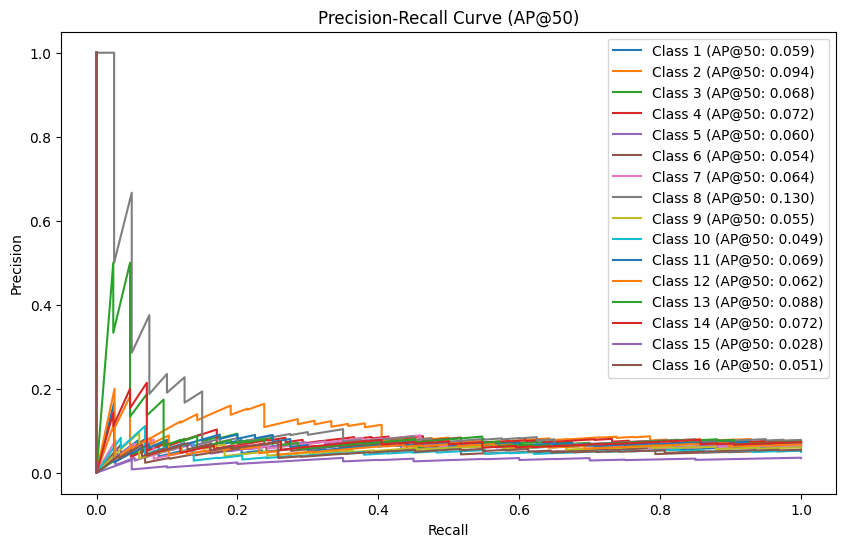

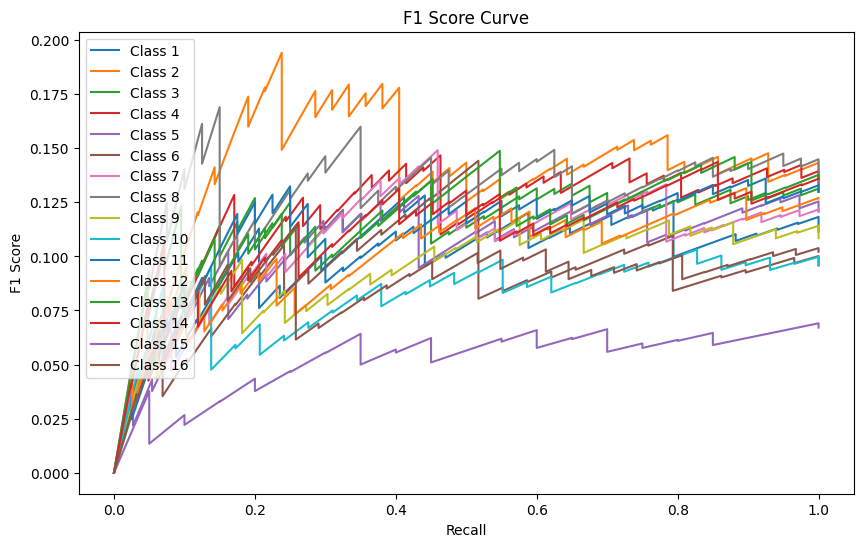

Class 1: AP@50 = 0.059
Class 2: AP@50 = 0.094
Class 3: AP@50 = 0.068
Class 4: AP@50 = 0.072
Class 5: AP@50 = 0.060
Class 6: AP@50 = 0.054
Class 7: AP@50 = 0.064
Class 8: AP@50 = 0.130
Class 9: AP@50 = 0.055
Class 10: AP@50 = 0.049
Class 11: AP@50 = 0.069
Class 12: AP@50 = 0.062
Class 13: AP@50 = 0.088
Class 14: AP@50 = 0.072
Class 15: AP@50 = 0.028
Class 16: AP@50 = 0.051

✅ Overall Model Performance:
Precision: 0.920
Recall: 0.967
F1 Score: 0.943


In [ ]:
def filter_results(model, data_loader, device, score_threshold=0.5):
    """
    Filters the model predictions by removing low-confidence detections
    and ensuring only images with ground truth are considered.
    """
    model.eval()
    filtered_results = []

    with torch.no_grad():
        for images, targets, img_name in data_loader:
            images = list(img.to(device) for img in images)
            predictions = model(images)[0]

            actual_labels = targets["labels"].cpu().numpy()
            predicted_labels = predictions["labels"].cpu().numpy()
            predicted_scores = predictions["scores"].cpu().numpy()
            predicted_boxes = predictions["boxes"].cpu().numpy()

            high_confidence_indices = np.where(predicted_scores >= score_threshold)[0]
            predicted_labels = predicted_labels[high_confidence_indices]
            predicted_scores = predicted_scores[high_confidence_indices]
            predicted_boxes = predicted_boxes[high_confidence_indices]

            if len(actual_labels) > 0 and len(predicted_labels) > 0:
                filtered_results.append({
                    "img_name": img_name,
                    "actual_labels": actual_labels,
                    "predicted_labels": predicted_labels,
                    "predicted_scores": predicted_scores,
                    "predicted_boxes": predicted_boxes
                })

    return filtered_results

# Run filtering
filtered_results = filter_results(model, test_loader, DEVICE, score_threshold=0.4)



def compute_precision_recall(filtered_results):
    """
    Computes Precision-Recall for each class and the whole model.
    - Precision-Recall curves
    - AP@50 (Average Precision at IoU=50)
    - F1 Score
    """
    class_metrics = {label: {"TP": 0, "FP": 0, "FN": 0, "scores": [], "gt": []} for label in range(1, num_classes)}

    for result in filtered_results:
        actual_labels = result["actual_labels"]
        predicted_labels = result["predicted_labels"]
        predicted_scores = result["predicted_scores"]

        for label in range(1, num_classes):
            gt_count = np.sum(actual_labels == label)
            pred_count = np.sum(predicted_labels == label)

            actual_labels = np.array(actual_labels).flatten().tolist()
            predicted_labels = np.array(predicted_labels).flatten().tolist()

            actual_labels_set = set(actual_labels)
            predicted_labels_set = set(predicted_labels)


            TP = len(actual_labels_set & predicted_labels_set)  # Intersection = Correct matches
            FP = len(predicted_labels_set - actual_labels_set)  # Predicted but not in actual
            FN = len(actual_labels_set - predicted_labels_set)

            class_metrics[label]["TP"] += TP
            class_metrics[label]["FP"] += FP
            class_metrics[label]["FN"] += FN
            class_metrics[label]["scores"].extend(predicted_scores)
            class_metrics[label]["gt"].extend([1 if gt == label else 0 for gt in actual_labels])



    precision_recall_results = {}
    for label in range(1, num_classes):
        y_true = np.array(class_metrics[label]["gt"])
        y_scores = np.array(class_metrics[label]["scores"])

        min_len = min(len(y_true), len(y_scores))
        if min_len == 0:
            continue

        y_true = y_true[:min_len]
        y_scores = y_scores[:min_len]

        precision, recall, _ = precision_recall_curve(y_true, y_scores)
        ap50 = auc(recall, precision)

        f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)

        precision_recall_results[label] = {
            "precision": precision,
            "recall": recall,
            "f1_scores": f1_scores,
            "AP@50": ap50
        }

    return precision_recall_results, class_metrics

# Run evaluation
precision_recall_results, class_metrics = compute_precision_recall(filtered_results)


plt.figure(figsize=(10, 6))
for label, metrics in precision_recall_results.items():
    plt.plot(metrics["recall"], metrics["precision"], label=f"Class {label} (AP@50: {metrics['AP@50']:.3f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (AP@50)")
plt.legend()
plt.show()


plt.figure(figsize=(10, 6))
for label, metrics in precision_recall_results.items():
    plt.plot(metrics["recall"], metrics["f1_scores"], label=f"Class {label}")

plt.xlabel("Recall")
plt.ylabel("F1 Score")
plt.title("F1 Score Curve")
plt.legend()
plt.show()


for label, metrics in precision_recall_results.items():
    print(f"Class {label}: AP@50 = {metrics['AP@50']:.3f}")


total_TP = sum(class_metrics[label]["TP"] for label in class_metrics)
total_FP = sum(class_metrics[label]["FP"] for label in class_metrics)
total_FN = sum(class_metrics[label]["FN"] for label in class_metrics)

overall_precision = total_TP / (total_TP + total_FP) if (total_TP + total_FP) > 0 else 0
overall_recall = total_TP / (total_TP + total_FN) if (total_TP + total_FN) > 0 else 0
overall_f1 = 2 * (overall_precision * overall_recall) / (overall_precision + overall_recall + 1e-6)

print(f"\n✅ Overall Model Performance:")
print(f"Precision: {overall_precision:.3f}")
print(f"Recall: {overall_recall:.3f}")
print(f"F1 Score: {overall_f1:.3f}")
